# DATA CHALLENGE ULACIT 2022 - Schrödinger 

> **The energy matrix of Costa Rica versus that of the world.** 

*By: Nicole Abarca Jiménez and Jose José Gómez Vanolli*



## Introduction

Energy in modern society is an essential ingredient for a wealth economy. Throughout the years, humans have learned to use different types of sources such as biomass combustion, wind force or water flow to produce energy for different purposes such as cooking, heating or transportation. As the world population continues to expand and cities to develop, new sources of energy like coal, oil, gas or even nuclear power have become necessary to fulfil the different needs. 

Non-renewable energy, or conventional sources of energy, are those that are limited so they will eventually run out or could take a long time to replenish.  Most of these sources are fossil fuels: coal, petroleum or oil and natural gas, with carbon as its main element. Nonetheless, burning fossil fuels is harmful for the environment as it results in the emission of greenhouse gases (mostly carbon dioxide, CO2) into the atmosphere and therefore perturbs Earth’s “carbon budget”, which balances the carbon in the ocean, earth and air.  Carbon dioxide is a gas that keeps heat in Earth’s atmosphere, a process necessary to life on Earth called the “greenhouse effect”. This process relies on a balanced carbon budget, otherwise, if unbalanced, it contributes to temperatures rising faster, aggravating global warming [1]. The exception is nuclear energy, which is not considered renewable, but its utilization emits considerably less greenhouse gases (GHG) than fossil fuels. 

The consumption of these sources along with their emission of GHG has been indicated as main responsible for climate change and global warming, that according to the UN is the greatest threat to human life on Earth.  Over the last 150 years fossil fuels have been major components of our energy production but as they do not represent renewable nor clean sources, a few years ago the need to implement and change to renewable and cleaner energy sources, diversifying the world energy matrix, arose. This energy matrix or energy mix is the combination of primary energy sources used in a geographical area [2]. This one is usually represented as the percentage of each source. 

In the other hand, renewable energy, is collected from renewable resources that are naturally replenished on a human timescale.  These sources are solar, wind, hydropower, geothermal, tidal, ocean and biomass. They are generally associated with the concept of clean energy because they have lower environmental impact compared to fossil fuels. However, while all renewable energies produce less CO2 per unit of electrical energy generated, none of them are actually zero carbon dioxide emissions. Still, they have the potential to slow down the effects of global warming, and can even offer broader benefits. 

Therefore a diversified and green energy matrix, that could be obtained by abandoning fossil energies and replacing them with renewable energies, is fundamental for the decarbonisation of the economy in which the world is embarking to fight against climate change. Since 2015 we can see an significant increment in the development and investment on renewable energy systems as a result of this global quest for a more sustainable and less harmful global energy grid.

*The interest of this study is then to describe the energy matrix of Costa Rica and compare it with the rest of the world.*

References:

[1] https://www.nationalgeographic.org/encyclopedia/non-renewable-energy/

[2] https://es.wikipedia.org/wiki/Matriz_energ%C3%A9tica 

[3] https://elperiodicodelaenergia.com/costa-rica-suma-su-sexto-ano-consecutivo-con-mas-de-98-de-generacion-electrica-renovable/

## Analysis of the energy matrix of Costa Rica

The analysis of the energy matrix of a country, region or territory, considers where the energy comes from, that is, the sources according to magnitude, and how that energy is consumed according to activity, that is, the uses that are given to that energy according to magnitude.

Costa Rica has been recognized since 2015 for producing more than 98% of its electricity from renewable sources. According to data from the National Center for Energy Control (CENCE), the production in 2020 with these sources reached 99.78%, and energy from fossil fuels was the lowest since 1986 [3]. In the following sections we will study this statistics with the data available for the challenge and recoleted from the National System of Climate Change Metrics (SINAMECC). 


In [3]:
# Import libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests, zipfile, io
import json
from google.colab import drive, files

### Generation by type of source

Energy is the ability of a body to do work 
in the form of movement, for example,
the amount of force required to move
by one meter to one kilogram of mass. In the system
International energy is measured in Joules (or Joules)
and it is easily convertible to other units more common in everyday life.

Energy is a natural resource originating from
systems that produce bodies with the ability to
produce work and its sources are those factors
biotic or abiotic that generate bodies with energy available for human use,
such as the sun, wind, flora, chemical elements, etc.

In [104]:
url_data = (r'https://raw.githubusercontent.com/Hakkoda1/hakkathon-energy-data/main/CR_Balance_Nacional_de_Energa_2012_2018/Generaci%C3%B3nxtipofuente.csv')
gen_source = pd.read_csv(url_data, thousands=',')

In [105]:
gen_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Año         11 non-null     object 
 1   Hidro       11 non-null     float64
 2   Geotérmica  11 non-null     float64
 3   Eólica      11 non-null     float64
 4   Biomasa     11 non-null     float64
 5   Solar       11 non-null     float64
 6   Térmica     11 non-null     float64
 7   Total       11 non-null     float64
dtypes: float64(7), object(1)
memory usage: 832.0+ bytes


In [106]:
gen_source.drop([10], axis = 0, inplace = True) # we delete the last row with the totals by type of source 

In [ ]:
gen_source2 = gen_source.copy() # we create a new dataset for the percentages

Next, we calculate the percentages out of the total for every type of source. 

In [ ]:
gen_source2['hidro'] = (gen_source[gen_source.columns[1]] / gen_source[gen_source.columns[7]]) * 100
gen_source2['geotermica'] = (gen_source[gen_source.columns[2]] / gen_source[gen_source.columns[7]]) * 100
gen_source2['eolica'] = (gen_source[gen_source.columns[3]] / gen_source[gen_source.columns[7]]) * 100
gen_source2['biomasa'] = (gen_source[gen_source.columns[4]] / gen_source[gen_source.columns[7]]) * 100
gen_source2['solar'] = (gen_source[gen_source.columns[5]] / gen_source[gen_source.columns[7]]) * 100
gen_source2['termica'] = (gen_source[gen_source.columns[6]] / gen_source[gen_source.columns[7]]) * 100

In [ ]:
drop_cols = list(range(1,8)) # drop the columns with absolute values

In [ ]:
gen_source2.drop(gen_source2.columns[drop_cols], axis=1, inplace= True)
gen_source2

,Año,hidro,geotermica,eolica,biomasa,solar,termica
1,2011,72.569338,13.014773,4.215805,1.413745,0.004888,8.781423
2,2012,71.092619,13.785178,5.193297,1.755616,0.012750,8.160567
3,2013,66.943265,14.820407,4.734849,1.791233,0.023885,11.686387
4,2014,65.749172,15.055661,7.191944,1.767976,0.024144,10.211130
5,2015,74.610130,12.723569,9.984677,1.658139,0.023432,1.000027
6,2016,73.769925,12.312051,10.545254,1.576382,0.022187,1.774176
7,2017,76.727175,9.884589,11.386461,1.631564,0.039374,0.330862
8,2018,72.555765,8.423368,15.644296,1.510305,0.487402,1.378864
9,2019,68.294992,13.198642,15.674798,1.475096,0.521981,0.834515


Is it necessary to change the data table from a wide format to a long format in order to perform a comparison analysis across the different types of generation sources along the years.

In [ ]:
gen_source_melt = pd.melt(gen_source2, id_vars= 'Año')

In [ ]:
gen_source_melt.head()

,Año,variable,value
0,2011,hidro,72.569338
1,2012,hidro,71.092619
2,2013,hidro,66.943265
3,2014,hidro,65.749172
4,2015,hidro,74.610130


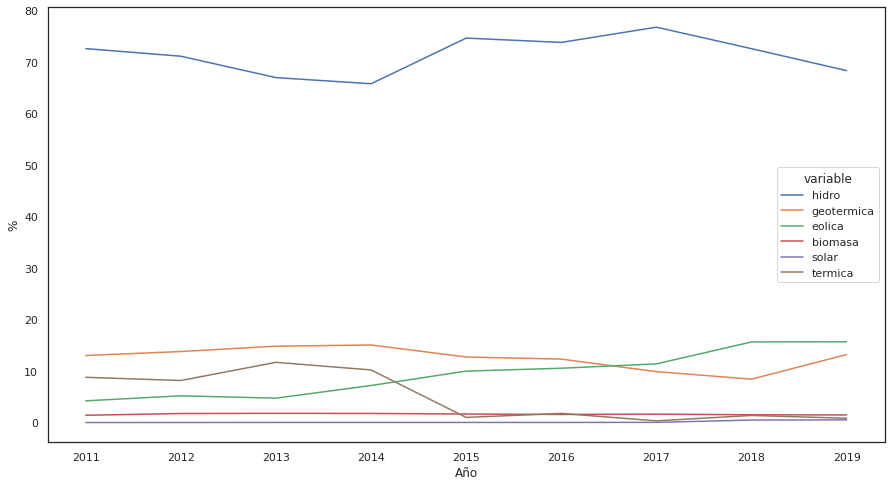

In [ ]:
sns.set_theme(style="white")
sns.lineplot(data = gen_source_melt, x = 'Año', y = 'value', hue = 'variable')
plt.ylabel('%')
fig = plt.gcf()
fig.set_size_inches(15, 8)

In [107]:
gen_source_melt0 = pd.melt(gen_source, id_vars= 'Año')
gen_source_melt0.groupby('variable')['value'].mean()

variable
Biomasa         613.580
Eólica         3466.999
Geotérmica     4761.779
Hidro         27409.450
Solar            47.596
Total         38159.432
Térmica        1860.029
Name: value, dtype: float64

We can see that the three biggest sources for generation of enery are: hydroelectric power, geothermal energy and wind power, where in average the country generates 27550.02 TJ, 4820.43 TJ and 3708.75 TJ respectively. 

Then the same analysis of the distribution of generation sources was done for the year 2019, the most recent one available in the dataset. 


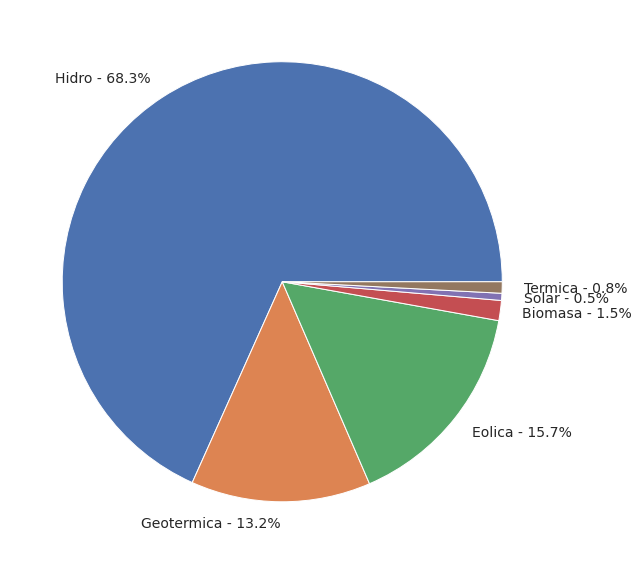

In [ ]:
gen_source_melt19 = gen_source_melt.loc[gen_source_melt['Año']=='2019']
labels = ['Hidro - 68.3%', 'Geotermica - 13.2%', 'Eolica - 15.7%', 'Biomasa - 1.5%', 'Solar - 0.5%', 'Termica - 0.8%']
plt.pie(x= 'value', labels = labels, data = gen_source_melt19, textprops={'fontsize': 14})
fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.tight_layout()

We can then analyze the different energy sources distribution for 2019 in Costa Rica, where the two most evident aspects are the decrease of thermal energy and the increment of wind power energy.

It is important to keep in mind that this thermal energy is the energy produced by burning a fuel, therefore it does not constitute a renewable source, contrary to the rest. This can then be considered as something positive for the country in terms of the fight against climate change. In Costa Rica this type of energy is generally used as backup in case river flows decrease or for an emergency in an electricity production center.

Costa Rica reached a cumulative 99.98% of renewable electricity generation with the five clean sources it uses, consolidating itself as a world leader in sustainable electricity production. 

The clean dataset is then downloaded into a csv file for further analysis.

In [108]:
#gen_source_melt.to_csv('gen_source_cr.csv', index = False, header=True)
#files.download("gen_source_cr.csv") # Download files to local PC

gen_source_melt0.to_csv('gen_source_cr_abs.csv', index = False, header=True)
files.download("gen_source_cr_abs.csv") # Download files to local PC

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Calculatation of yearly growths for generation

In [ ]:
# Total 
A1 = gen_source.copy()
A1.drop({"Hidro", "Geotérmica", "Eólica", "Biomasa", "Solar", "Térmica" }, axis = 1, inplace = True)
A1

,Año,Total
0,2010,34499.95
1,2011,35393.24
2,2012,36627.60
3,2013,36842.78
4,2014,36778.79
5,2015,38921.94
6,2016,39166.91
7,2017,40711.86
8,2018,41394.96
9,2019,41256.29


In [ ]:
n = 1
n1 = 10
while n <= 9:
  A1.loc[n1] = ((A1.iloc[n]['Total'] - A1.iloc[n-1]['Total'])/A1.iloc[n-1]['Total']) * 100
  n += 2
  n1 += 1

n2 = 0
while n2 <= 9:
  A1.drop(n2, axis = 0, inplace = True)
  n2 += 1

# We calculate the mean of our new table and round it to two decimal places
np.around(A1['Total'].mean(), decimals=2)

2.52

As we can see from the file `Generaciónxtipofuente.csv` Costa Rica generated 41256.29 TJ in 2019 and on average we have an annual growth of 2.5%. 

### Consumption by type of source

In [98]:
url_data = (r'https://raw.githubusercontent.com/Hakkoda1/hakkathon-energy-data/main/CR_Balance_Nacional_de_Energa_2012_2018/Consumoxtipofuente.csv')
cons_source = pd.read_csv(url_data, thousands=',')

In [ ]:
cons_source.head(15)

,Año,Carbón Mineral,Coque,Leña,Bagazo,Otros Res. Veg.,Carbón Vegetal,Casc. de Café,Biogas,Electricidad,G.L.P,Gasolina Regular,Gasolina Súper,Kerosene,Jet Fuel,Av-Gas,Diesel,Gasoleo,Fuel Oil,Total
0,2010,29.89,2675.36,13998.14,9836.32,4395.70,41.80,375.26,-,30832.33,5404.43,19138.93,12426.14,128.74,7138.21,58.09,37366.90,230.96,5037.69,149114.89
1,2011,229.20,3717.92,12839.58,7729.44,4448.78,32.34,407.07,2.99,31223.25,5542.26,19073.05,13200.62,164.18,7436.25,55.96,37846.49,253.23,4776.77,148979.37
2,2012,91.97,3382.79,12161.88,8088.95,4385.46,35.59,461.19,3.03,32468.42,5708.17,19309.81,14356.44,282.75,7369.51,54.38,38341.17,280.72,5038.86,151821.08
3,2013,204.32,3359.27,12059.79,9864.93,4161.97,38.29,461.19,3.03,32767.30,6032.98,19657.83,14599.83,257.25,6869.56,52.24,38437.05,285.36,4530.13,153642.31
4,2014,248.10,3288.28,11066.46,10318.32,4360.37,47.01,371.96,3.03,31149.97,6479.78,19525.17,15559.74,261.09,6937.01,48.56,39234.72,275.64,4184.00,155359.20
5,2015,14.00,3211.70,10825.70,10072.36,3789.58,56.85,371.37,3.03,33942.28,6817.76,20132.66,17866.27,303.50,7575.90,48.37,41315.37,250.41,4199.91,160797.02
6,2016,13.51,3493.96,10170.89,10072.36,3742.20,44.58,437.15,3.03,35225.10,7464.69,20419.83,20610.48,287.68,8462.44,49.15,43900.44,290.26,4287.28,168975.04
7,2017,214.02,3786.46,10211.16,9359.19,3329.99,46.34,400.44,3.03,35642.33,7934.88,20565.07,21401.84,275.21,8446.03,53.16,44661.06,372.48,4273.74,170976.41
8,2018,13.87,3534.58,8603.49,9134.57,3224.83,42.19,347.55,3.03,35958.98,8215.20,20563.59,21740.81,245.85,9379.58,41.04,44766.79,393.71,4107.84,170317.49
9,2019,10.19,1728.44,8582.54,9060.66,3258.67,38.18,372.59,3.03,36573.21,8736.27,21566.84,22426.14,204.06,9973.41,41.83,44303.51,391.21,4145.23,171416.03


- Last row shows the total consumption for all the years by type of source (not needed). 
- Last column shows the total consumption for a year across the multiple types of sources (needed to calculate the percentage by source). 

In [101]:
cons_source.drop(10, axis = 0, inplace = True)

In [ ]:
cons_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               11 non-null     object 
 1   Carbón Mineral    11 non-null     float64
 2   Coque             11 non-null     float64
 3   Leña              11 non-null     float64
 4   Bagazo            11 non-null     float64
 5   Otros Res. Veg.   11 non-null     float64
 6   Carbón Vegetal    11 non-null     float64
 7   Casc. de Café     11 non-null     float64
 8   Biogas            11 non-null     object 
 9   Electricidad      11 non-null     float64
 10  G.L.P             11 non-null     float64
 11  Gasolina Regular  11 non-null     float64
 12  Gasolina Súper    11 non-null     float64
 13  Kerosene          11 non-null     float64
 14  Jet Fuel          11 non-null     float64
 15  Av-Gas            11 non-null     float64
 16  Diesel            11 non-null     float64
 17 

In [ ]:
cons_source

,Año,Carbón Mineral,Coque,Leña,Bagazo,Otros Res. Veg.,Carbón Vegetal,Casc. de Café,Biogas,Electricidad,G.L.P,Gasolina Regular,Gasolina Súper,Kerosene,Jet Fuel,Av-Gas,Diesel,Gasoleo,Fuel Oil,Total
0,2010,29.89,2675.36,13998.14,9836.32,4395.70,41.80,375.26,2.99,30832.33,5404.43,19138.93,12426.14,128.74,7138.21,58.09,37366.90,230.96,5037.69,149114.89
1,2011,229.20,3717.92,12839.58,7729.44,4448.78,32.34,407.07,2.99,31223.25,5542.26,19073.05,13200.62,164.18,7436.25,55.96,37846.49,253.23,4776.77,148979.37
2,2012,91.97,3382.79,12161.88,8088.95,4385.46,35.59,461.19,3.03,32468.42,5708.17,19309.81,14356.44,282.75,7369.51,54.38,38341.17,280.72,5038.86,151821.08
3,2013,204.32,3359.27,12059.79,9864.93,4161.97,38.29,461.19,3.03,32767.30,6032.98,19657.83,14599.83,257.25,6869.56,52.24,38437.05,285.36,4530.13,153642.31
4,2014,248.10,3288.28,11066.46,10318.32,4360.37,47.01,371.96,3.03,31149.97,6479.78,19525.17,15559.74,261.09,6937.01,48.56,39234.72,275.64,4184.00,155359.20
5,2015,14.00,3211.70,10825.70,10072.36,3789.58,56.85,371.37,3.03,33942.28,6817.76,20132.66,17866.27,303.50,7575.90,48.37,41315.37,250.41,4199.91,160797.02
6,2016,13.51,3493.96,10170.89,10072.36,3742.20,44.58,437.15,3.03,35225.10,7464.69,20419.83,20610.48,287.68,8462.44,49.15,43900.44,290.26,4287.28,168975.04
7,2017,214.02,3786.46,10211.16,9359.19,3329.99,46.34,400.44,3.03,35642.33,7934.88,20565.07,21401.84,275.21,8446.03,53.16,44661.06,372.48,4273.74,170976.41
8,2018,13.87,3534.58,8603.49,9134.57,3224.83,42.19,347.55,3.03,35958.98,8215.20,20563.59,21740.81,245.85,9379.58,41.04,44766.79,393.71,4107.84,170317.49
9,2019,10.19,1728.44,8582.54,9060.66,3258.67,38.18,372.59,3.03,36573.21,8736.27,21566.84,22426.14,204.06,9973.41,41.83,44303.51,391.21,4145.23,171416.03


In [102]:
cons_source['Total'].mean()

160139.884

To calculate growth rate, start by subtracting the past value from the current value. Then, divide that number by the past value. Finally, multiply your answer by 100 to express it as a percentage. For example, if the value of your company was $10

In [ ]:
annual_growth_rate = []
cr_consump = cons_source['Total']

for idx, elem in enumerate(cr_consump):
  past_val = elem
  current_val = cr_consump[(idx+1)% len(cr_consump)]
  annual_growth_rate.append(((current_val-past_val)/past_val)*100)


In [ ]:
annual_growth_rate

[-0.09088294267595852,
 1.9074520183566301,
 1.1995896748989079,
 1.1174591165675742,
 3.500159630070171,
 5.085927587464009,
 1.1844175329089996,
 -0.3853864986403755,
 0.6449954141527146,
 -13.009950119600825]

In [ ]:
annual_growth_rate.pop() # we delete the last element because it was comparing 2019 against 2010 which has no sense

-13.009950119600825

In [ ]:
# Python program to get average of a list
def Average(lst):
    return sum(lst) / len(lst)

Average(annual_growth_rate)

1.5737479481225192

There is a missing value for `Biogas` in 2010 so we decided to set the value equal to the one from 2011 because there is not a high variaton in the values across the different years. 

In [ ]:
cons_source.loc[0,'Biogas'] = 2.99

In [ ]:
cons_source['Biogas'] = pd.to_numeric(cons_source['Biogas']) # we convert that column to numeric type

In [ ]:
cons_source2 = cons_source.copy() # a copy of the dataset is done in order to calculate the percentages in a new table

In [ ]:
cons_source2['carbon_mineral'] = (cons_source[cons_source.columns[1]] / cons_source[cons_source.columns[19]]) * 100
cons_source2['coque'] = (cons_source[cons_source.columns[2]] / cons_source[cons_source.columns[19]]) * 100
cons_source2['leña'] = (cons_source[cons_source.columns[3]] / cons_source[cons_source.columns[19]]) * 100
cons_source2['bagazo'] = (cons_source[cons_source.columns[4]] / cons_source[cons_source.columns[19]]) * 100
cons_source2['otros_res_veg'] = (cons_source[cons_source.columns[5]] / cons_source[cons_source.columns[19]]) * 100
cons_source2['carb_veg'] = (cons_source[cons_source.columns[6]] / cons_source[cons_source.columns[19]]) * 100
cons_source2['casc_cafe'] = (cons_source[cons_source.columns[7]] / cons_source[cons_source.columns[19]]) * 100
cons_source2['biogas'] = (cons_source[cons_source.columns[8]] / cons_source[cons_source.columns[19]]) * 100
cons_source2['electricidad'] = (cons_source[cons_source.columns[9]] / cons_source[cons_source.columns[19]]) * 100
cons_source2['glp'] = (cons_source[cons_source.columns[10]] / cons_source[cons_source.columns[19]]) * 100
cons_source2['gas_regular'] = (cons_source[cons_source.columns[11]] / cons_source[cons_source.columns[19]]) * 100
cons_source2['gas_super'] = (cons_source[cons_source.columns[12]] / cons_source[cons_source.columns[19]]) * 100
cons_source2['kerosene'] = (cons_source[cons_source.columns[13]] / cons_source[cons_source.columns[19]]) * 100
cons_source2['jet_fuel'] = (cons_source[cons_source.columns[14]] / cons_source[cons_source.columns[19]]) * 100
cons_source2['av_gas'] = (cons_source[cons_source.columns[15]] / cons_source[cons_source.columns[19]]) * 100
cons_source2['diesel'] = (cons_source[cons_source.columns[16]] / cons_source[cons_source.columns[19]]) * 100
cons_source2['gasoleo'] = (cons_source[cons_source.columns[17]] / cons_source[cons_source.columns[19]]) * 100
cons_source2['fuel_oil'] = (cons_source[cons_source.columns[18]] / cons_source[cons_source.columns[19]]) * 100

In [ ]:
drop_cols = list(range(1,20))

In [ ]:
cons_source2.drop(cons_source2.columns[drop_cols], axis=1, inplace= True)

In [ ]:
cons_source2

,Año,carbon_mineral,coque,leña,bagazo,otros_res_veg,carb_veg,casc_cafe,biogas,electricidad,glp,gas_regular,gas_super,kerosene,jet_fuel,av_gas,diesel,gasoleo,fuel_oil
0,2010,0.020045,1.794160,9.387486,6.596471,2.947861,0.028032,0.251658,0.002005,20.676896,3.624340,12.835023,8.333266,0.086336,4.787054,0.038957,25.059134,0.154887,3.378395
1,2011,0.153847,2.495594,8.618361,5.188262,2.986172,0.021708,0.273239,0.002007,20.958103,3.720153,12.802477,8.860703,0.110203,4.991463,0.037562,25.403846,0.169977,3.206330
2,2012,0.060578,2.228142,8.010666,5.327949,2.888571,0.023442,0.303772,0.001996,21.385976,3.759801,12.718794,9.456157,0.186239,4.854076,0.035818,25.254181,0.184902,3.318946
3,2013,0.132984,2.186422,7.849264,6.420712,2.708870,0.024922,0.300171,0.001972,21.327003,3.926640,12.794542,9.502480,0.167434,4.471138,0.034001,25.017230,0.185730,2.948491
4,2014,0.159694,2.116566,7.123144,6.641589,2.806638,0.030259,0.239419,0.001950,20.050290,4.170838,12.567759,10.015332,0.168056,4.465143,0.031257,25.254198,0.177421,2.693114
5,2015,0.008707,1.997363,6.732525,6.264022,2.356748,0.035355,0.230956,0.001884,21.108774,4.239979,12.520543,11.111070,0.188747,4.711468,0.030081,25.694114,0.155730,2.611933
6,2016,0.007995,2.067737,6.019167,5.960857,2.214647,0.026383,0.258707,0.001793,20.846333,4.417629,12.084524,12.197352,0.170250,5.008101,0.029087,25.980429,0.171777,2.537227
7,2017,0.125175,2.214610,5.972262,5.473966,1.947631,0.027103,0.234208,0.001772,20.846344,4.640921,12.028016,12.517423,0.160964,4.939880,0.031092,26.121182,0.217855,2.499608
8,2018,0.008144,2.075289,5.051442,5.363260,1.893423,0.024771,0.204060,0.001779,21.112911,4.823462,12.073681,12.764872,0.144348,5.507115,0.024096,26.284318,0.231162,2.411872
9,2019,0.005945,1.008330,5.006848,5.285772,1.901030,0.022273,0.217360,0.001768,21.335933,5.096530,12.581577,13.082872,0.119044,5.818248,0.024403,25.845605,0.228223,2.418228


In [ ]:
cons_source_melt = pd.melt(cons_source2, id_vars="Año")
cons_source_melt.head()

,Año,variable,value
0,2010,carbon_mineral,0.020045
1,2011,carbon_mineral,0.153847
2,2012,carbon_mineral,0.060578
3,2013,carbon_mineral,0.132984
4,2014,carbon_mineral,0.159694


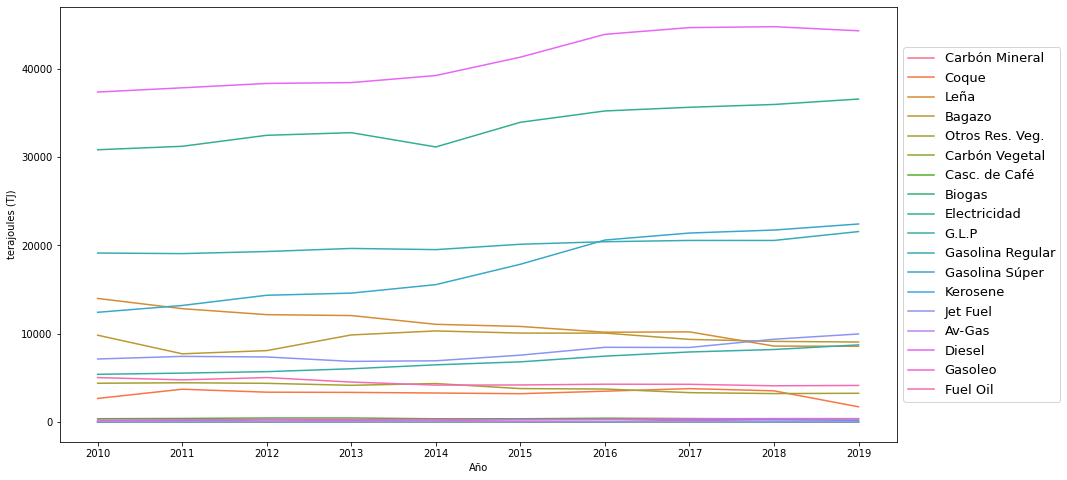

In [ ]:
cons_source_melt0 = pd.melt(cons_source, id_vars="Año")

sns.lineplot(x = 'Año', y = 'value', hue = 'variable', data = cons_source_melt0.loc[cons_source_melt0['variable']!= 'Total'])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=13)
plt.ylabel('terajoules (TJ)')
fig = plt.gcf()
fig.set_size_inches(15, 8)

Diesel has been the type of energy with the highest consumption along the years, followed by electricity. Then, this same analysis was done just for the most recent year.

In [ ]:
cons_source19 = cons_source_melt.loc[cons_source_melt['Año']=='2019']
cons_source19.head()

,Año,variable,value
9,2019,carbon_mineral,0.005945
19,2019,coque,1.008330
29,2019,leña,5.006848
39,2019,bagazo,5.285772
49,2019,otros_res_veg,1.901030


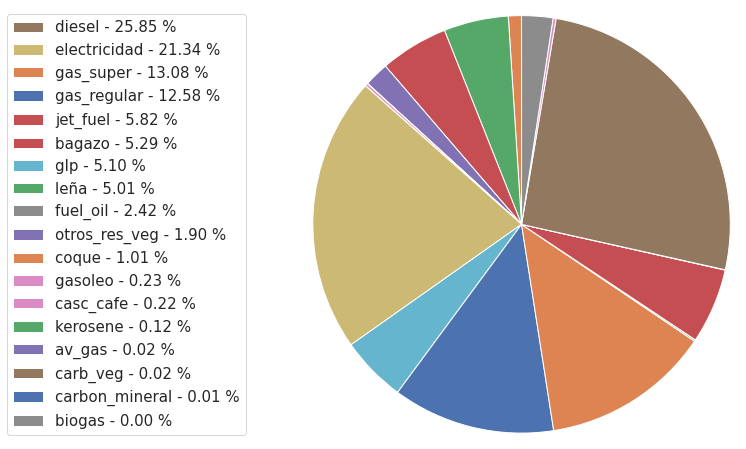

In [ ]:
percent = cons_source19['value']
patches, texts = plt.pie(cons_source19['value'], startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(cons_source19['variable'], percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, percent),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.7, 0.5), fontsize=15)
fig = plt.gcf()
fig.set_size_inches(15, 8)

We can see that in the first 5 places we have 3 different types of fuels (diesel, gas_super, gas_regular) that those could be used either for the generation of electricity or the transportation industry.

In [ ]:
cons_source_melt0.to_csv('consump_source_cr.csv', index = False, header = True)
files.download('consump_source_cr.csv')

cons_source_melt.to_csv('consump_source_cr_per.csv', index = False, header = True)
files.download('consump_source_cr_per.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Consumption by Sector

In [ ]:
url_data = (r'https://raw.githubusercontent.com/Hakkoda1/hakkathon-energy-data/main/CR_Balance_Nacional_de_Energa_2012_2018/Consumo%20final%20por%20sector.csv')
demand_sec_cr = pd.read_csv(url_data, thousands=',')

In [ ]:
demand_sec_cr

,Año,Residencial,Servicios,Comercial,Público,Transporte,Industria,Agropecuario
0,2010,23382.0,6146.0,3513.0,3869.0,70319.0,37995.0,2854.0
1,2011,22139.0,6087.0,3479.0,3951.0,72109.0,36973.0,3092.0
2,2012,21586.0,6206.0,3636.0,4230.0,74111.0,37740.0,3242.0
3,2013,21366.0,6246.0,3870.0,4296.0,74637.0,38994.0,3273.0
4,2014,20603.0,6417.0,3980.0,4454.0,76186.0,39206.0,3254.0
5,2015,20791.0,6671.0,4114.0,4575.0,81526.0,38368.0,3327.0
6,2016,20620.0,7042.0,4306.0,4687.0,87538.0,39728.0,3584.0
7,2017,20652.0,7175.0,4322.0,4690.0,89061.0,40047.0,3761.0
8,2018,19481.0,7303.0,4464.0,4803.0,91231.0,39262.0,3337.0


In [ ]:
demand_sec_cr_melt = pd.melt(demand_sec_cr, id_vars="Año")

In [ ]:
demand_sec_cr2 = demand_sec_cr.copy()

In [ ]:
demand_sec_cr2['Total'] = demand_sec_cr2.sum(axis=1)

In [ ]:
demand_sec_cr2['residencial'] = (demand_sec_cr2['Residencial'] / demand_sec_cr2['Total']) *100
demand_sec_cr2['servicios'] = (demand_sec_cr2['Servicios'] / demand_sec_cr2['Total']) *100
demand_sec_cr2['comercial'] = (demand_sec_cr2['Comercial'] / demand_sec_cr2['Total']) *100
demand_sec_cr2['público'] = (demand_sec_cr2['Público'] / demand_sec_cr2['Total']) *100
demand_sec_cr2['transporte'] = (demand_sec_cr2['Transporte'] / demand_sec_cr2['Total']) *100
demand_sec_cr2['industria'] = (demand_sec_cr2['Industria'] / demand_sec_cr2['Total']) *100
demand_sec_cr2['agropecuario'] = (demand_sec_cr2['Agropecuario'] / demand_sec_cr2['Total']) *100

In [ ]:
demand_sec_cr2.drop('Residencial',inplace = True, axis = 1)
demand_sec_cr2.drop('Servicios',inplace = True, axis = 1)
demand_sec_cr2.drop('Comercial',inplace = True, axis = 1)
demand_sec_cr2.drop('Público',inplace = True, axis = 1)
demand_sec_cr2.drop('Transporte',inplace = True, axis = 1)
demand_sec_cr2.drop('Industria',inplace = True, axis = 1)
demand_sec_cr2.drop('Agropecuario',inplace = True, axis = 1)
demand_sec_cr2.drop('Total',inplace = True, axis = 1)

In [ ]:
demand_sec_cr2

,Año,residencial,servicios,comercial,público,transporte,industria,agropecuario
0,2010,15.578860,4.094931,2.340627,2.577821,46.851847,25.315148,1.901551
1,2011,14.774995,4.062306,2.321794,2.636795,48.123678,24.674822,2.063521
2,2012,14.130385,4.062502,2.380157,2.768995,48.513711,24.704935,2.122242
3,2013,13.811694,4.037622,2.501697,2.777077,48.247843,25.207020,2.115776
4,2014,13.197407,4.110458,2.549419,2.853043,48.801517,25.113699,2.084374
5,2015,12.882698,4.133542,2.549152,2.834801,50.515841,23.773910,2.061504
6,2016,12.163685,4.154058,2.540098,2.764849,51.638440,23.435445,2.114192
7,2017,12.026205,4.178192,2.516815,2.731111,51.862571,23.320425,2.190130
8,2018,11.332818,4.248425,2.596874,2.794083,53.072444,22.840156,1.941256


In [ ]:
demand_sec_cr2_melt = pd.melt(demand_sec_cr2, id_vars="Año")

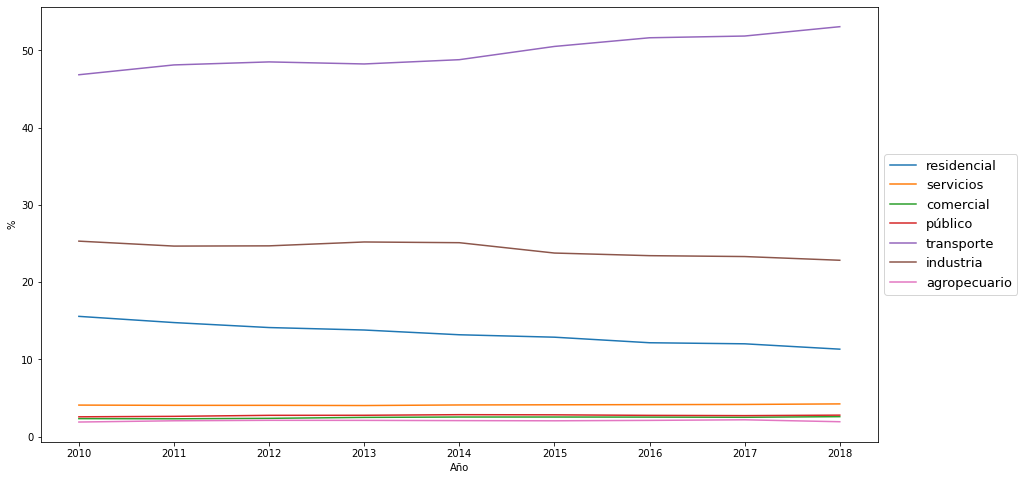

In [ ]:
sns.lineplot(x='Año', y='value', hue='variable', data = demand_sec_cr2_melt)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=13)
plt.ylabel('%')
fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.show()

In [ ]:
demand_sec_cr_melt.to_csv('demand_sec_cr.csv', index = False, header = True)
files.download('demand_sec_cr.csv')

demand_sec_cr2_melt.to_csv('demand_sec_cr_per.csv', index = False, header = True)
files.download('demand_sec_cr_per.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Transport


In [ ]:
url_data = (r'https://raw.githubusercontent.com/Hakkoda1/hakkathon-energy-data/main/CR_Balance_Nacional_de_Energa_2012_2018/Transporte.csv')
transport_cr = pd.read_csv(url_data, thousands=',')

In [ ]:
transport_cr

,Año,Terrestre,Marítimo,Aéreo
0,2010,63360.0,85.0,6874.0
1,2011,64876.0,84.0,7149.0
2,2012,66765.0,56.0,7290.0
3,2013,67772.0,90.0,6775.0
4,2014,69263.0,78.0,6845.0
5,2015,73986.0,91.0,7448.0
6,2016,79120.0,58.0,8360.0
7,2017,80669.0,65.0,8327.0
8,2018,81953.0,51.0,9227.0


In [ ]:
transport_cr_melt = pd.melt(transport_cr, id_vars="Año")

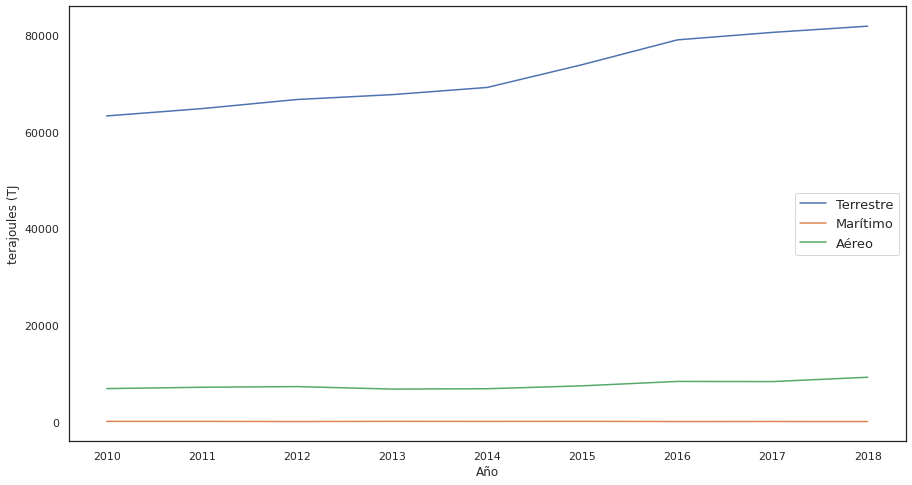

In [ ]:
sns.lineplot(x='Año', y='value', hue='variable', data = transport_cr_melt)
plt.legend(loc='center right', fontsize=13)
plt.ylabel('terajoules (TJ')
fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.show()

The type of transport with the highest consumption is land transport.

#### Residencial

In [ ]:
url_data = (r'https://raw.githubusercontent.com/Hakkoda1/hakkathon-energy-data/main/CR_Balance_Nacional_de_Energa_2012_2018/Residencial.csv')
resid_cr = pd.read_csv(url_data, thousands=',')

In [ ]:
resid_cr

,Año,1. Urbano,2. Rural
0,2010,10514.0,12868.0
1,2011,11513.0,10626.0
2,2012,11950.0,9636.0
3,2013,12090.0,9276.0
4,2014,12606.0,7996.0
5,2015,13197.0,7594.0
6,2016,13459.0,7161.0
7,2017,13687.0,6964.0
8,2018,13521.0,5959.0


In [ ]:
resid_cr_melt = pd.melt(resid_cr, id_vars="Año")

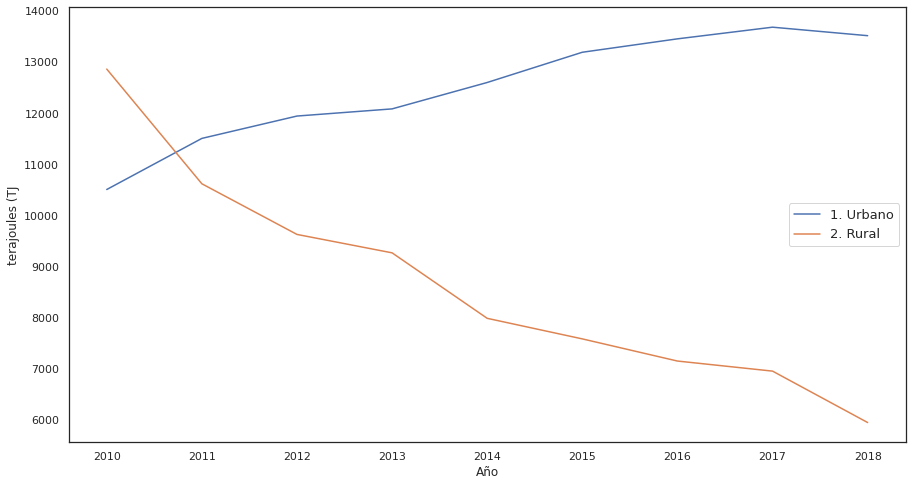

In [ ]:
sns.lineplot(x='Año', y='value', hue='variable', data = resid_cr_melt)
plt.legend(loc='center right', fontsize=13)
plt.ylabel('terajoules (TJ')
fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.show()

From the residential sector we've seen an increment in the urban area along with an important decrease in the rural area. This could be due to the modernization of many cities.

#### Industry

In [ ]:
url_data = (r'https://raw.githubusercontent.com/Hakkoda1/hakkathon-energy-data/main/CR_Balance_Nacional_de_Energa_2012_2018/Industria.csv')
industry_cr = pd.read_csv(url_data, thousands=',', header = 1)

In [ ]:
industry_cr

,Año,1. Produc.de alimentos y tabaco (CIIU 31),2. Producción de textiles y cuero (CIIU 32),3. Producción de madera (CIIU 33),4. Producción de papel (CIIU 34),5. Producción de químicos (CIIU 35),6. Otras industrias (CIIU 36-39)
0,2010,22612.0,918.0,3485.0,1070.0,2076.0,7833.0
1,2011,17734.0,886.0,5713.0,1061.0,2048.0,9532.0
2,2012,18489.0,882.0,5917.0,1126.0,2069.0,9257.0
3,2013,19839.0,838.0,5877.0,1223.0,2000.0,9218.0
4,2014,19986.0,787.0,6055.0,1220.0,1948.0,9210.0
5,2015,19956.0,810.0,5534.0,1257.0,1870.0,8941.0
6,2016,20435.0,841.0,5704.0,1311.0,1899.0,9538.0
7,2017,20367.0,868.0,5131.0,1359.0,2084.0,10238.0
8,2018,20442.0,876.0,5086.0,1366.0,1974.0,9518.0


In [ ]:
industry_cr_melt = pd.melt(industry_cr, id_vars="Año")

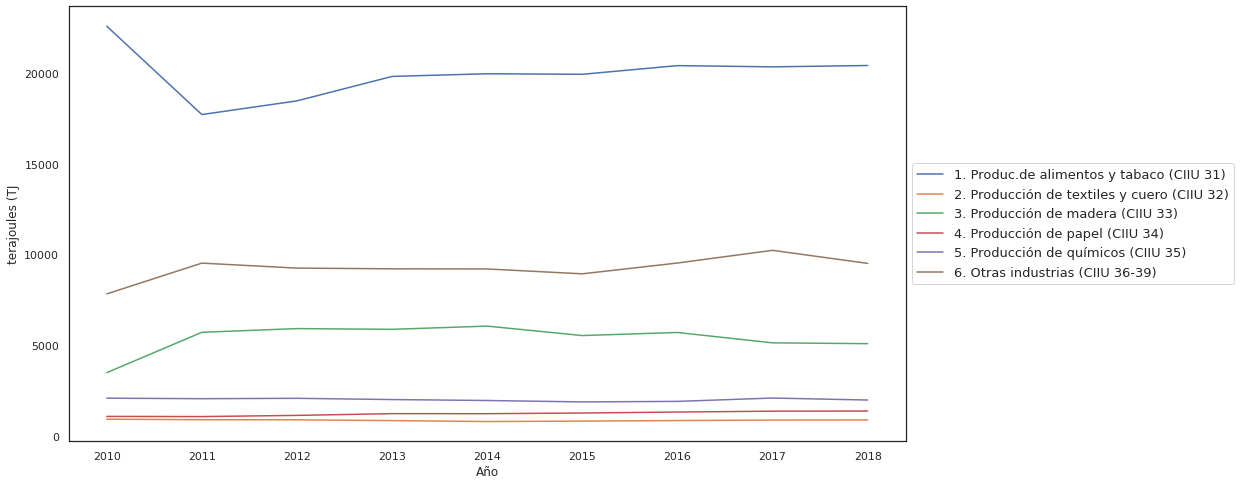

In [ ]:
sns.lineplot(x='Año', y='value', hue='variable', data = industry_cr_melt)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=13)
plt.ylabel('terajoules (TJ')
fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.show()

And for industries the food and tobacco production industry has the highest consumption, followed by textile and leather production and in the third place wood production. 

### Transformation losses

In [ ]:
url_data = (r'https://raw.githubusercontent.com/Hakkoda1/hakkathon-energy-data/main/CR_Balance_Nacional_de_Energa_2012_2018/Centros%20de%20transformaci%C3%B3n.csv')
transf_loss_2 = pd.read_csv(url_data, thousands=',')

In [ ]:
transf_loss2_melt = pd.melt(transf_loss_2, id_vars='Descripción')
transf_loss2_melt.head()

,Descripción,variable,value
0,Total Transformado,2010,"-44,588.00"
1,Carboneras,2010,-125.00
2,Refinerías,2010,-300.00
3,Centrales Eléctricas Sector Público,2010,"-38,773.00"
4,Centrales Hidroeléctricas,2010,"-1,089.00"


In [ ]:
transf_loss2_melt['value'] = pd.to_numeric(transf_loss2_melt['value'])

ValueError: ignored

In [ ]:
url_data = (r'https://raw.githubusercontent.com/Hakkoda1/hakkathon-energy-data/main/CR_Balance_Nacional_de_Energa_2012_2018/Centros%20de%20transf.%20por%20sector.csv')
transf_loss = pd.read_csv(url_data, thousands=',')

In [ ]:
transf_loss

,Año,Carboneras,Refinerías,Centrales Eléctricas Sector Público,Centrales Eléctricas Sector Privado,Destilerías
0,2010,-125.0,-300.0,-38773.0,-5389.0,597.0
1,2011,-97.0,-39.0,-39212.0,-5511.0,632.0
2,2012,-107.0,0.0,-42701.0,-5794.0,742.0
3,2013,-115.0,0.0,-46583.0,-5776.0,742.0
4,2014,-141.0,0.0,-45971.0,-5693.0,705.0
5,2015,-171.0,0.0,-40774.0,-6660.0,705.0
6,2016,-134.0,0.0,-40582.0,-7585.0,630.0
7,2017,-65.0,0.0,-41318.0,-6830.0,630.0
8,2018,-25.0,0.0,-29583.0,-1877.0,608.0


In [ ]:
col1 = transf_loss['Año']
col2 = transf_loss['Centrales Eléctricas Sector Público']
new_data = pd.DataFrame()

In [ ]:
transf_loss.drop(columns=['Destilerías'], inplace = True)
transf_loss

,Año,Carboneras,Refinerías,Centrales Eléctricas Sector Público,Centrales Eléctricas Sector Privado
0,2010,-125.0,-300.0,-38773.0,-5389.0
1,2011,-97.0,-39.0,-39212.0,-5511.0
2,2012,-107.0,0.0,-42701.0,-5794.0
3,2013,-115.0,0.0,-46583.0,-5776.0
4,2014,-141.0,0.0,-45971.0,-5693.0
5,2015,-171.0,0.0,-40774.0,-6660.0
6,2016,-134.0,0.0,-40582.0,-7585.0
7,2017,-65.0,0.0,-41318.0,-6830.0
8,2018,-25.0,0.0,-29583.0,-1877.0


In [ ]:
transf_loss_melt = pd.melt(transf_loss, id_vars='Año')
transf_loss_melt.head()

,Año,variable,value
0,2010,Carboneras,-125.0
1,2011,Carboneras,-97.0
2,2012,Carboneras,-107.0
3,2013,Carboneras,-115.0
4,2014,Carboneras,-141.0


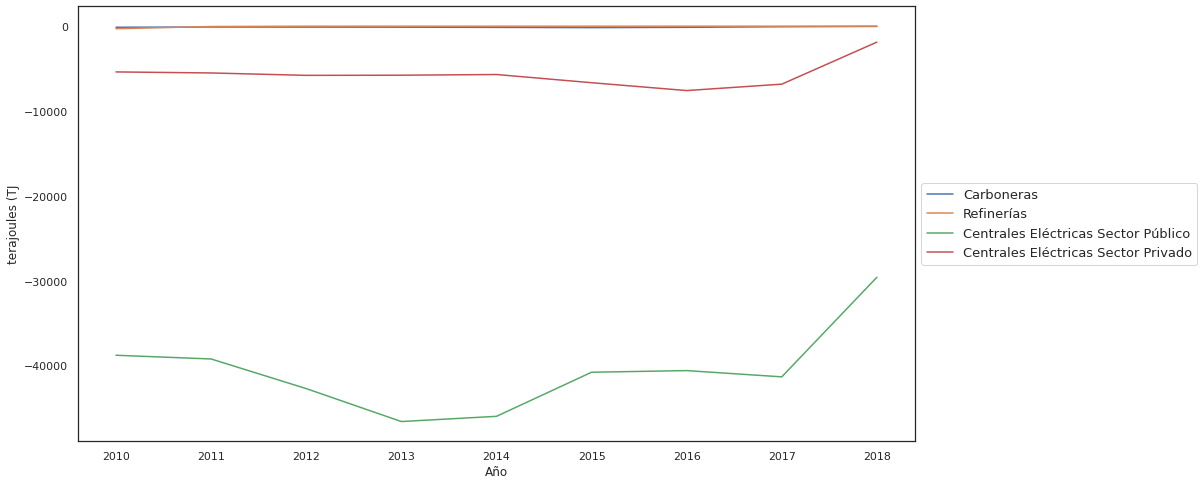

In [ ]:
sns.lineplot(x='Año', y='value', hue='variable', data = transf_loss_melt)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=13)
plt.ylabel('terajoules (TJ')
fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.show()

From the file `Centros de transformación.csv` we can see that from 'Centrales Eléctricas Sector Público' most of the losses come from the 'Centrales Geotérmicas', the same happens with 'Centrales Eléctricas Sector Privado'. 
Then is also noticeable that from 2017 there was a reduction in the losses for transformation. 

### Imports

In [ ]:
url_data = (r'https://raw.githubusercontent.com/Hakkoda1/hakkathon-energy-data/main/CR_Balance_Nacional_de_Energa_2012_2018/Importaciones.csv')
imports_cr = pd.read_csv(url_data, thousands=',')

In [ ]:
imports_cr

,Año,Importaciones (TJ)
0,2010,104818.94
1,2011,105991.40
2,2012,105521.89
3,2013,108967.28
4,2014,112928.31
5,2015,107389.30
6,2016,115170.04
7,2017,122745.30
8,2018,117521.10
9,2019,123790.75


In [ ]:
imports_cr.drop(10, axis = 0, inplace = True)

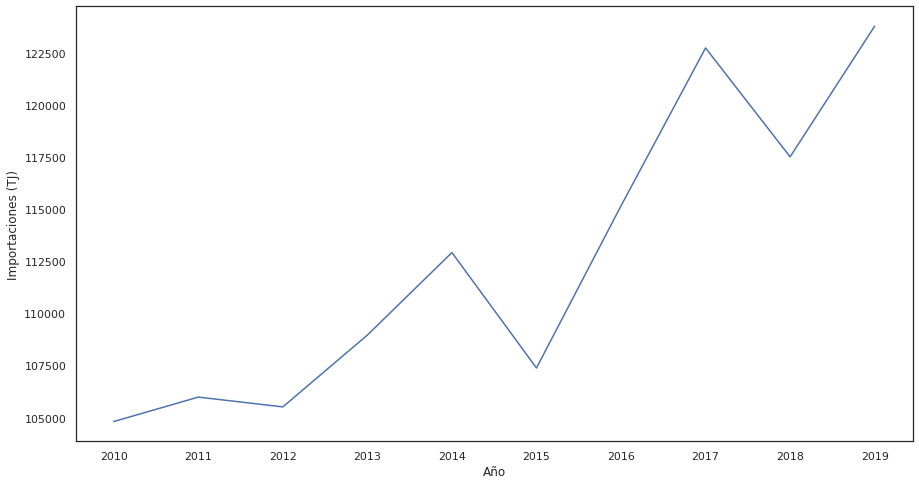

In [ ]:
# Graficamos nuestra tabla resultante
sns.lineplot(data = imports_cr, x= "Año", y="Importaciones (TJ)")
fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.show()

Since 2015 the imports have been increasing considerably. 

### Exports

In [ ]:
url_data = (r'https://raw.githubusercontent.com/Hakkoda1/hakkathon-energy-data/main/CR_Balance_Nacional_de_Energa_2012_2018/Oferta.csv')
supply_cr = pd.read_csv(url_data, thousands=',')

In [ ]:
supply_cr

,Año,Transferencias,Producción,Importación,Exportación,Variación de Inventario,No aprovechada,Oferta Interna
0,2010,53.0,124793.0,104819.0,5789.0,-617.0,22529.0,200729.0
1,2011,44.0,121627.0,105991.0,3469.0,-924.0,24332.0,198937.0
2,2012,-230.0,123614.0,105522.0,4902.0,2479.0,21636.0,204848.0
3,2013,75.0,125407.0,108967.0,4600.0,1960.0,20261.0,211549.0
4,2014,72.0,125189.0,112928.0,2826.0,-2063.0,19382.0,213919.0
5,2015,77.0,128647.0,107389.0,2950.0,-707.0,17392.0,215063.0
6,2016,-13.0,129472.0,115170.0,2925.0,420.0,17392.0,224733.0
7,2017,-56.0,132627.0,122745.0,3231.0,-2246.0,19280.0,230558.0
8,2018,-16.0,113220.0,117521.0,3462.0,2519.0,17886.0,211896.0


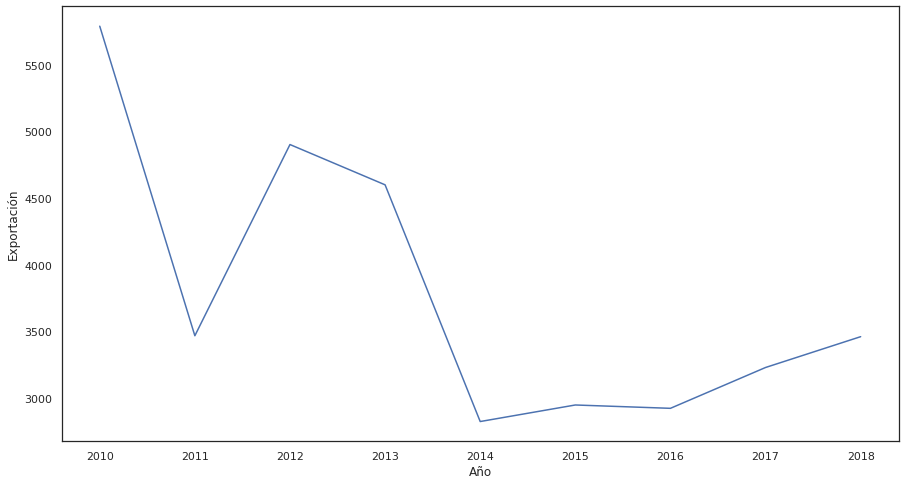

In [ ]:
sns.lineplot(data = supply_cr, x= "Año", y="Exportación")
fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.show()

In [ ]:
supply_cr.to_csv('energy_supply_cr.csv', index = False, header=True)
files.download("energy_supply_cr.csv") # Download files to local PC

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Meanwhile, the exports have been decreasing throught the years.

### **Conclusions:**

1. In Costa Rica the main source of energy production is Hydroelectric. the next two sources are geothermal and wind power, however, these two are significantly smaller than hydro. Hydroelectric represented 68.3% of the total energy generated in 2019, while geothermal and wind power together only represented 28.9%.

2. The energy production in the country has been increasing annually by approximately 2.52%

3. Diesel is by far the most used energy source in Costa Rica, representing 25.85% of total consumption, the second is electricity, but it only represented 21.34%.

4. Energy consumption is distributed among several sectors, however in Costa Rica there is a clear dominance of the transportation industry. This industry is not only the largest consumer of energy but also represents more than half of the total consumption with 53% in 2018.

5. Being more specific, within the transportation industry, the ground transportation industry is the main consumer.

6. Residential consumption has been constantly increasing, however the urban is the only one that represents growth. Rural consumption has been declining since 2010.

7. In terms of industry, food and tobacco production are the largest consumers of electricity.

8. Costa Rica's imports have been increasing since 2010, while energy exports have been declining exponentially.

## Analysis of the energy matrix for the rest of the world and other indicators

### Generation by type of source

The file available is in json format, so we first read it as in a dictionary data type and then we transform it to a pandas data frame.

In [ ]:
# Python program to read json file
f = open('ELECGEN_2007_2019_Electricity_Gen_by_country_Gwh.json')
elect_gen_by_country = json.load(f)

In [ ]:
elect_gen_by_country[0] # first dictionary entry

{'Country/area': 'Afghanistan',
 'Electricity generation by country/area (GWh)': '..',
 'Grid connection': 'Off-grid',
 'Technology': 'On-grid Solar photovoltaic',
 'Year': 2007}

In [ ]:
elect_gen_by_country = pd.json_normalize(elect_gen_by_country)
#df_players.to_csv('df_players.csv', index = False, header=True)

elect_gen_by_country.head()

NameError: ignored

,Country/area,Technology,Grid connection,Year,Electricity generation by country/area (GWh)
0,Afghanistan,On-grid Solar photovoltaic,Off-grid,2007,..
1,Afghanistan,On-grid Solar photovoltaic,Off-grid,2008,..
2,Afghanistan,On-grid Solar photovoltaic,Off-grid,2009,..
3,Afghanistan,On-grid Solar photovoltaic,Off-grid,2010,..
4,Afghanistan,On-grid Solar photovoltaic,Off-grid,2011,..


In [ ]:
elect_gen_by_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98124 entries, 0 to 98123
Data columns (total 5 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Country/area                                  98124 non-null  object
 1   Technology                                    98124 non-null  object
 2   Grid connection                               98124 non-null  object
 3   Year                                          98124 non-null  int64 
 4   Electricity generation by country/area (GWh)  98124 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


We analyze the different types of technologies for energy generation availables in the dataset.


In [ ]:
elect_gen_by_country['Technology'].value_counts()

On-grid Solar photovoltaic     5772
Liquid biofuels                5772
Nuclear                        5772
Fossil fuels                   5772
Marine energy                  5772
Geothermal energy              5772
Renewable municipal waste      5772
Biogas                         5772
Solid biofuels                 5772
Off-grid Solar photovoltaic    5772
Pumped storage                 5772
Mixed Hydro Plants             5772
Renewable hydropower           5772
Offshore wind energy           5772
Onshore wind energy            5772
Concentrated solar power       5772
Other non-renewable energy     5772
Name: Technology, dtype: int64

Then looking at the data we realized that most of the `Grid connection =='Off-grid'` values were missing so we decided to keep analyzing just the 'On-grid' observations.

In [ ]:
elect_gen_by_country2 = elect_gen_by_country.loc[elect_gen_by_country['Grid connection']=='On-grid']

In [ ]:
elect_gen_by_country2

,Country/area,Technology,Grid connection,Year,Electricity generation by country/area (GWh)
13,Afghanistan,On-grid Solar photovoltaic,On-grid,2007,..
14,Afghanistan,On-grid Solar photovoltaic,On-grid,2008,..
15,Afghanistan,On-grid Solar photovoltaic,On-grid,2009,..
16,Afghanistan,On-grid Solar photovoltaic,On-grid,2010,..
17,Afghanistan,On-grid Solar photovoltaic,On-grid,2011,..
...,...,...,...,...,...
98119,Zimbabwe,Other non-renewable energy,On-grid,2015,..
98120,Zimbabwe,Other non-renewable energy,On-grid,2016,..
98121,Zimbabwe,Other non-renewable energy,On-grid,2017,..
98122,Zimbabwe,Other non-renewable energy,On-grid,2018,..


In [ ]:
elect_gen_by_country2['Country/area'].value_counts() # different countries/areas available are 222

Afghanistan    221
Paraguay       221
New Zealand    221
Nicaragua      221
Niger          221
              ... 
Georgia        221
Germany        221
Ghana          221
Greece         221
Zimbabwe       221
Name: Country/area, Length: 222, dtype: int64

The final dataset is then downloaded and it will be analyzed using Tableau, a powerful visualization tool. 

In [ ]:
elect_gen_by_country2.to_csv('elect_gen_by_country2.csv', index = False, header=True)
files.download("elect_gen_by_country2.csv") # Download files to local PC

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Energy trends by country

The `Energy trends.csv` from **Climate_data_trends** folder had to be manually structured because it was a file of type json containing 4 different data sets which caused an error when first trying to load it as an unique csv or json file. So using Notepad++ the different data sets were identified and divided in four differents json files, `public_energy`, `trends_renew_energy`, `climatescope_overview` and `climatescope_global_ranking`.

In [4]:
f = open('public_energy.json')
public_energy = json.load(f)

In [5]:
public_energy[0]

{'Country/area': 'Afghanistan',
 'Public Investments (2019 million USD)': '..',
 'Technology': 'Solar energy',
 'Year': 2000}

In [6]:
public_energy = pd.json_normalize(public_energy)

In [7]:
public_energy.head()

,Country/area,Public Investments (2019 million USD),Technology,Year
0,Afghanistan,..,Solar energy,2000
1,Afghanistan,0.1,Solar energy,2001
2,Afghanistan,..,Solar energy,2002
3,Afghanistan,..,Solar energy,2003
4,Afghanistan,..,Solar energy,2004


We replace the ".." to NaN values to be able to convert the column to numeric type and plot the values throught the years.

In [8]:
public_energy.replace('..', np.nan, inplace= True)
public_energy['Public Investments (2019 million USD)'] = pd.to_numeric(public_energy['Public Investments (2019 million USD)'])

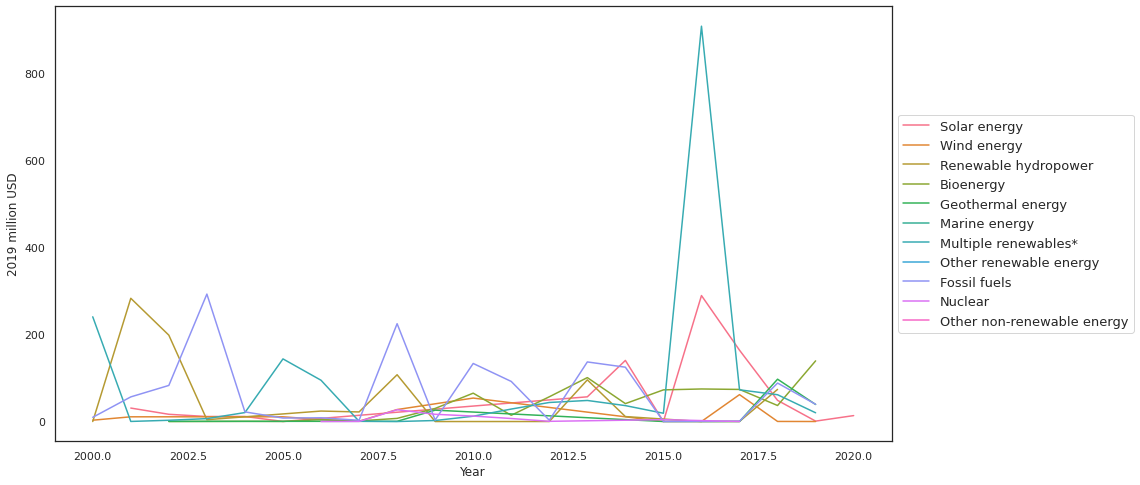

In [ ]:
sns.lineplot(x='Year', y='Public Investments (2019 million USD)', hue='Technology', data = public_energy.loc[public_energy['Country/area']=='China'])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=13)
plt.ylabel('2019 million USD')
fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.show()

In [10]:
public_energy.loc[(public_energy['Country/area']=='China') & (public_energy['Year']==2016)]

,Country/area,Public Investments (2019 million USD),Technology,Year
7408,China,289.24,Solar energy,2016
7429,China,0.09,Wind energy,2016
7450,China,0.03,Renewable hydropower,2016
7471,China,74.77,Bioenergy,2016
7492,China,NaN,Geothermal energy,2016
7513,China,NaN,Marine energy,2016
7534,China,907.75,Multiple renewables*,2016
7555,China,NaN,Other renewable energy,2016
7576,China,0.33,Fossil fuels,2016
7597,China,NaN,Nuclear,2016


Choosing a different country in the data parameter from the code above we can see the evolution of Public Investments (2019 million USD) for the different technologies across the years. For example, we can see for Costa Rica that in 2011 there was an important investment in 'Renewable hydropower" while in 2015 it was for 'Geothermal energy".

**Climatescope global ranking**

Climatescope is a market study, report and index that analyzes the conditions for investment in energy transition worldwide and assesses the ability to attract capital for green technologies.

It also provides a snapshot of the current state of clean energy finance and policy and a guide to what may happen in the future.

The climatescope covers almost every nation in the world with more than 2 million inhabitants. Developed markets are defined as OECD countries minus Chile, Colombia, *Costa Rica*, Mexico and Turkey. These five are part of the OECD, but remain attractive emerging markets for clean energy development. Developing markets include all non-OECD nations plus these five countries.

From: https://global-climatescope.org/about/

In [ ]:
f = open('climatescope_global_ranking.json')
climatescope_global_ranking = json.load(f)

In [ ]:
climatescope_global_ranking[0]

{'  Climatescope Score (Decimal)': '  2.55 ',
 'Data*': 'View Details',
 'Geography': 'India',
 'Rank': '1',
 'Region': 'Asia-Pacific'}

In [ ]:
climatescope_global_ranking = pd.json_normalize(climatescope_global_ranking)

In [ ]:
climatescope_global_ranking

,Climatescope Score (Decimal),Data*,Geography,Rank,Region
0,2.55,View Details,India,1,Asia-Pacific
1,2.50,View Details,Chile,2,Americas
2,2.50,View Details,Mainland China,3,Asia-Pacific
3,2.43,View Details,Croatia,4,Europe
4,2.41,View Details,Vietnam,5,Asia-Pacific
...,...,...,...,...,...
102,0.77,View Details,Kyrgyzstan,103,Asia-Pacific
103,0.77,View Details,Lesotho,104,Middle East & Africa
104,0.75,View Details,Congo,105,Middle East & Africa
105,0.75,View Details,Eritrea,106,Middle East & Africa


In [ ]:
climatescope_global_ranking['Rank'] = pd.to_numeric(climatescope_global_ranking['Rank'])

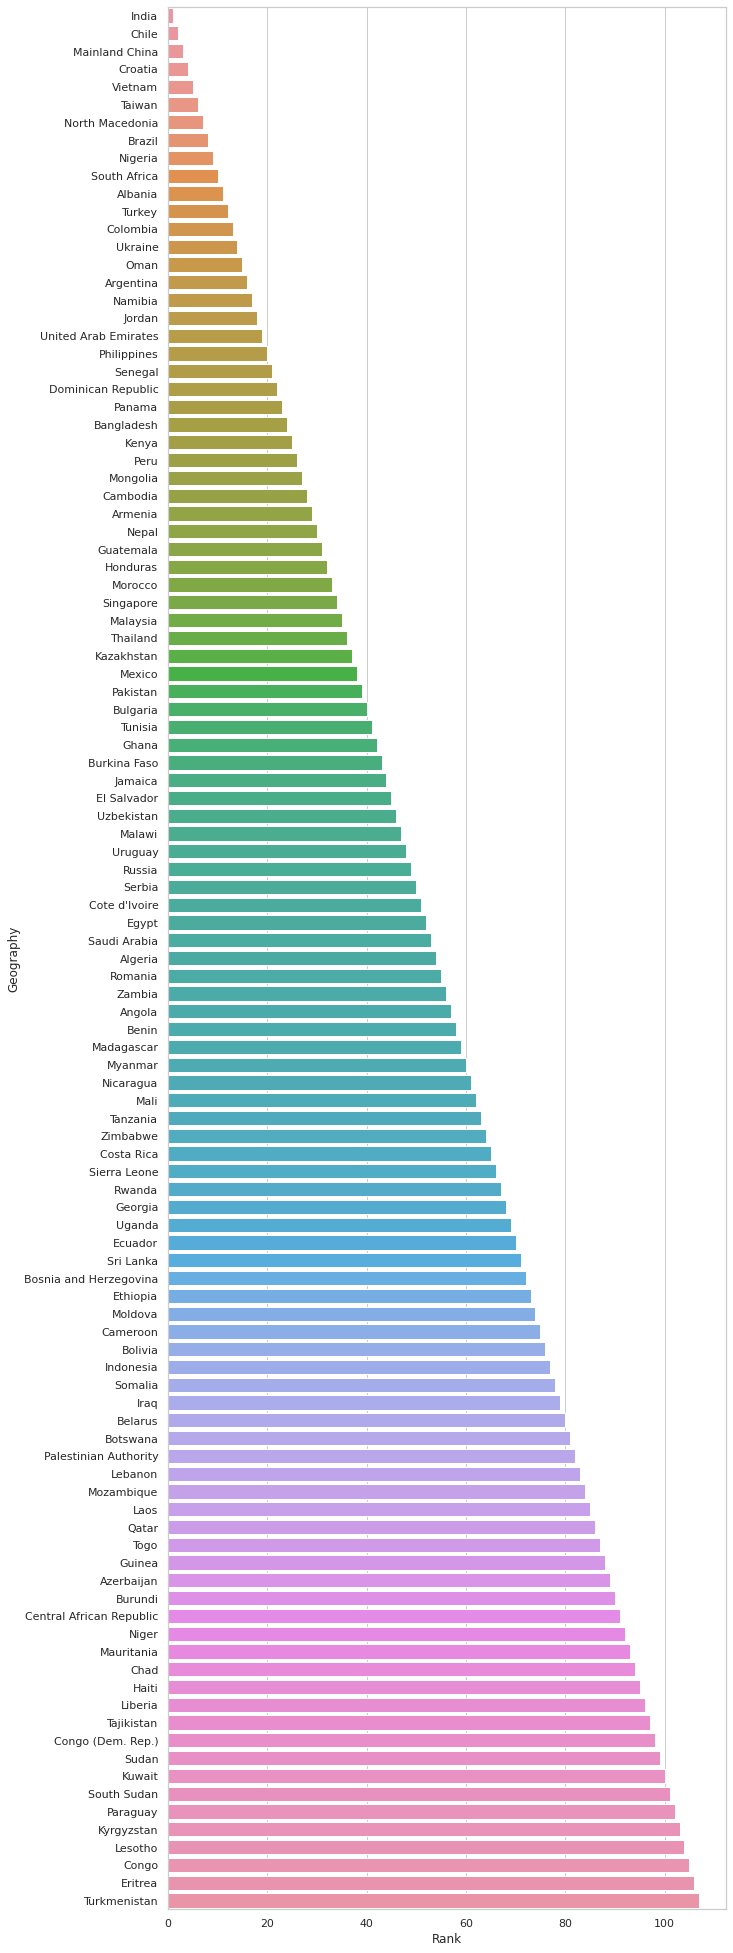

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Rank", y="Geography", data=climatescope_global_ranking.sort_values(by=['Rank'], ascending = True))
fig = plt.gcf()
fig.set_size_inches(10, 35)

In [ ]:
climatescope_global_ranking.loc[climatescope_global_ranking['Geography']=='Costa Rica']

,Climatescope Score (Decimal),Data*,Geography,Rank,Region
64,1.66,View Details,Costa Rica,65,Americas


### Energy Information Administration (EIA)

Scientists define energy as the ability to do work. Modern civilization is possible because people have learned how to change energy from one form to another and then use it to do work. There are many different forms of energy, including:
- Heat
- Light
- Motion
- Electrical
- Chemical
- Gravitational

These forms of energy can be grouped into two general types of energy for doing work:
- Potential or stored energy
- Kinetic or working energy

There are many different sources of energy, which can be divided into two basic categories:
- Renewable energy sources that can be easily replenished
- Nonrenewable energy sources that cannot be easily replenished

Renewable and nonrenewable energy sources can be used as primary energy sources to produce useful energy such as heat, or they can used to produce secondary energy sources such as electricity and hydrogen.

From: https://www.eia.gov/energyexplained/what-is-energy/ 

In the EIA_Energy_Information_Administration folder we have available the production and consumption for different types of sources such as: Biofuels,
Coal and Coke, Electricity, Hydrocarbon gas liquids, Natural gas, Petroleum and other liquids and Primary energy. For some sources the imports, exports and reserves are also available.

#### Primary Energy

##### Total Energy Consumption

In [ ]:
url_data = (r'https://raw.githubusercontent.com/Hakkoda1/hakkathon-energy-data/main/EIA_Energy_Information_Administration/Primary%20energy/total-energy-consumption.csv')
pr_energy_cons = pd.read_csv(url_data, thousands=',', header = 1)

In [ ]:
pr_energy_cons.columns

Index(['API', 'Unnamed: 1', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

In [ ]:
pr_energy_cons.head(20)

,API,Unnamed: 1,1980,1981,1982,1983,1984,1985,1986,1987,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,NaN,World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,INTL.44-2-WORL-QBTU.A,Consumption (quad Btu),292.89978962044677,289.40102169937586,289.6911022148106,293.73162574512844,307.2343654436228,315.4271480750418,322.18485367832346,332.7462452429408,...,526.7304676782012,540.4951270120151,551.6003834140112,561.0921505733213,566.1299422438332,567.3288217730257,572.1592307317517,584.2018162974296,597.7365823171332,601.0404899538854
2,INTL.4411-2-WORL-QBTU.A,Coal (quad Btu),78.65613402957176,78.9635811572502,80.42233145882604,82.63117397819225,86.35602132998221,89.40927570308125,90.43233993374493,94.05052174459549,...,157.78400778429594,166.2996775467487,171.40109186597854,173.32209852457285,172.36054129319592,167.55604551302267,163.26576382050655,164.2355903925062,165.88969331156548,163.97177585957522
3,INTL.4413-2-WORL-QBTU.A,Natural gas (quad Btu),53.865223303,53.895423471,54.055255448,55.149772666,60.842896415,63.371661785,64.224390643,67.561969979,...,119.42387934839795,122.99248610538244,125.80264763157163,127.65467615117959,128.14512471331605,130.05169300073453,132.69922920813946,137.0509911947091,143.8918578857722,146.92339602648022
4,INTL.4415-2-WORL-QBTU.A,Petroleum and other liquids (quad Btu),132.06401937163076,126.81113213676979,123.92428288938333,122.21533499685697,123.41709237538814,123.47159748556288,127.00641121864258,129.26577065229108,...,177.93274273599405,178.82455167979182,181.73874865005945,183.7594021705714,186.52025825071738,189.3365688883315,192.51128575791682,195.93670633542715,196.92883215112363,196.07735760722844
5,INTL.4419-2-WORL-QBTU.A,"Nuclear, renewables, and other (quad Btu)",28.278044616244237,29.6404771213559,31.229996382601204,33.66568072507923,36.53782339725242,39.100817440397684,40.476408861935965,41.77073925805424,...,72.6310827315133,73.44644694709217,73.69926256740155,77.47841774999748,80.26401923860385,81.54694664393696,84.95746341918888,88.29469710978718,92.36296608467185,95.41886761060158
6,INTL.4417-2-WORL-QBTU.A,Nuclear (quad Btu),7.575700462108056,8.527153469041346,9.50768642751678,10.718344095623602,12.994607878980153,15.298615144911766,16.247905140338766,17.643888337124533,...,27.37991816251363,26.247553137332254,24.474108820505307,24.651921363938744,25.138315345434304,25.43752788818358,25.712197376129314,25.89828117063508,26.513243556955885,27.65989087153229
7,INTL.4418-2-WORL-QBTU.A,Renewables and other (quad Btu),20.70234415413618,21.113323652314552,21.722309955084427,22.947336629455624,23.543215518272262,23.80220229548592,24.228503721597203,24.12685092092971,...,45.25116456899967,47.19889380975991,49.22515374689624,52.826496386058736,55.12570389316955,56.10941875575339,59.24526604305957,62.3964159391521,65.84972252771597,67.75897673906928
8,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,INTL.44-2-AFG-QBTU.A,Consumption (quad Btu),0.02658321667756184,0.029949457623843767,0.031897814673808554,0.03902180313163165,0.03920224040186807,0.03827496129519434,0.039111198580053776,0.06306515769145625,...,0.11853852864995157,0.16105080218714038,0.1476076485691699,0.12450427328434109,0.1143137511302674,0.12629013628746977,0.11757565429923286,0.12494125714475693,0.14327311946093876,0.12274842133951257


The table structure is not well defined. The country was defined in a row alone and after that there were 7 observation belonging to consumption of different sources and then the values for every year were in different columns. So we first identify the countries names and row index and put those into two lists, deleting the rows from the original dataset. 

In [ ]:
nan_rows = pr_energy_cons[pr_energy_cons['API'].isnull()]

In [ ]:
country_name = []
country_index = []

for i, row in pr_energy_cons.iterrows():
  if i in nan_rows.index:
    country_name.append(nan_rows['Unnamed: 1'][i])
    country_index.append(i)

In [ ]:
country_name

['World',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Angola',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo-Brazzaville',
 'Congo-Kinshasa',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Côte d’Ivoire',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Falkland Islands',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'Former Czechos

In [ ]:
country_index

In [ ]:
pr_energy_cons2 = pr_energy_cons.drop(country_index, axis = 0)

In [ ]:
pr_energy_cons2['country'] = np.repeat(country_name,7) # we add a new column where we repeat every country name 7 times 
pr_energy_cons2.drop(columns=['API'], inplace = True) # drop the first column that does not contain any important info
pr_energy_cons2.rename(columns = {'Unnamed: 1':'source'}, inplace = True) # rename the country for type of source

In [ ]:
pr_energy_cons2.head()

,source,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,country
1,Consumption (quad Btu),292.89978962044677,289.40102169937586,289.6911022148106,293.73162574512844,307.2343654436228,315.4271480750418,322.18485367832346,332.7462452429408,345.56087642070815,...,540.4951270120151,551.6003834140112,561.0921505733213,566.1299422438332,567.3288217730257,572.1592307317517,584.2018162974296,597.7365823171332,601.0404899538854,World
2,Coal (quad Btu),78.65613402957176,78.9635811572502,80.42233145882604,82.63117397819225,86.35602132998221,89.40927570308125,90.43233993374493,94.05052174459549,96.87317779039795,...,166.2996775467487,171.40109186597854,173.32209852457285,172.36054129319592,167.55604551302267,163.26576382050655,164.2355903925062,165.88969331156548,163.97177585957522,World
3,Natural gas (quad Btu),53.865223303,53.895423471,54.055255448,55.149772666,60.842896415,63.371661785,64.224390643,67.561969979,71.010048252,...,122.99248610538244,125.80264763157163,127.65467615117959,128.14512471331605,130.05169300073453,132.69922920813946,137.0509911947091,143.8918578857722,146.92339602648022,World
4,Petroleum and other liquids (quad Btu),132.06401937163076,126.81113213676979,123.92428288938333,122.21533499685697,123.41709237538814,123.47159748556288,127.00641121864258,129.26577065229108,133.44581391475253,...,178.82455167979182,181.73874865005945,183.7594021705714,186.52025825071738,189.3365688883315,192.51128575791682,195.93670633542715,196.92883215112363,196.07735760722844,World
5,"Nuclear, renewables, and other (quad Btu)",28.278044616244237,29.6404771213559,31.229996382601204,33.66568072507923,36.53782339725242,39.100817440397684,40.476408861935965,41.77073925805424,44.15438110955765,...,73.44644694709217,73.69926256740155,77.47841774999748,80.26401923860385,81.54694664393696,84.95746341918888,88.29469710978718,92.36296608467185,95.41886761060158,World


In [ ]:
pr_energy_cons_melt = pd.melt(pr_energy_cons2, id_vars=['country', 'source'], var_name='year', value_name='value')
pr_energy_cons_melt

,country,source,year,value
0,World,Consumption (quad Btu),1980,292.89978962044677
1,World,Coal (quad Btu),1980,78.65613402957176
2,World,Natural gas (quad Btu),1980,53.865223303
3,World,Petroleum and other liquids (quad Btu),1980,132.06401937163076
4,World,"Nuclear, renewables, and other (quad Btu)",1980,28.278044616244237
...,...,...,...,...
64675,Zimbabwe,Natural gas (quad Btu),2019,0
64676,Zimbabwe,Petroleum and other liquids (quad Btu),2019,0.0554979345
64677,Zimbabwe,"Nuclear, renewables, and other (quad Btu)",2019,0.06808920146710537
64678,Zimbabwe,Nuclear (quad Btu),2019,NaN


In [ ]:
pr_energy_cons_world = pr_energy_cons_melt.loc[pr_energy_cons_melt['country']=='World']

In [ ]:
pr_energy_cons_world.head()

,country,source,year,value
0,World,Consumption (quad Btu),1980,292.89978962044677
1,World,Coal (quad Btu),1980,78.65613402957176
2,World,Natural gas (quad Btu),1980,53.865223303
3,World,Petroleum and other liquids (quad Btu),1980,132.06401937163076
4,World,"Nuclear, renewables, and other (quad Btu)",1980,28.278044616244237


In [ ]:
pr_energy_cons_world['source'].value_counts()

    Consumption (quad Btu)                           40
        Coal (quad Btu)                              40
        Natural gas (quad Btu)                       40
        Petroleum and other liquids (quad Btu)       40
        Nuclear, renewables, and other (quad Btu)    40
            Nuclear (quad Btu)                       40
            Renewables and other (quad Btu)          40
Name: source, dtype: int64

In [ ]:
pr_energy_cons_world = pr_energy_cons_world.loc[(pr_energy_cons_world['source'] != '    Consumption (quad Btu)')]

In [ ]:
pr_energy_cons_world = pr_energy_cons_world.loc[(pr_energy_cons_world['source'] != '        Nuclear, renewables, and other (quad Btu)')]

In [ ]:
pr_energy_cons_world['value'] = pd.to_numeric(pr_energy_cons_world['value'])

In [ ]:
pr_energy_cons_world['source'].value_counts()

        Coal (quad Btu)                           40
        Natural gas (quad Btu)                    40
        Petroleum and other liquids (quad Btu)    40
            Nuclear (quad Btu)                    40
            Renewables and other (quad Btu)       40
Name: source, dtype: int64

In [ ]:
tot_year = pr_energy_cons_world.groupby('year')['value'].sum()

In [ ]:
tot_year = tot_year.reset_index()

In [ ]:
tot_year # same to consumption value

,year,value
0,1980,292.863421
1,1981,289.310614
2,1982,289.631866
3,1983,293.661962
4,1984,307.153834
5,1985,315.353352
6,1986,322.139551
7,1987,332.649002
8,1988,345.483421
9,1989,351.356004


In [ ]:
pr_energy_cons_world1 = pr_energy_cons_world.merge(tot_year, left_on='year', right_on='year')

In [ ]:
pr_energy_cons_world1.rename(columns = {'value_x':'value'}, inplace = True) 
pr_energy_cons_world1.rename(columns = {'value_y':'year_tot'}, inplace = True) 

In [ ]:
pr_energy_cons_world1.head(10)

,country,source,year,value,year_tot
0,World,Coal (quad Btu),1980,78.656134,292.863421
1,World,Natural gas (quad Btu),1980,53.865223,292.863421
2,World,Petroleum and other liquids (quad Btu),1980,132.064019,292.863421
3,World,Nuclear (quad Btu),1980,7.575700,292.863421
4,World,Renewables and other (quad Btu),1980,20.702344,292.863421
5,World,Coal (quad Btu),1981,78.963581,289.310614
6,World,Natural gas (quad Btu),1981,53.895423,289.310614
7,World,Petroleum and other liquids (quad Btu),1981,126.811132,289.310614
8,World,Nuclear (quad Btu),1981,8.527153,289.310614
9,World,Renewables and other (quad Btu),1981,21.113324,289.310614


In [ ]:
pr_energy_cons_world1['value_per'] = (pr_energy_cons_world1['value']/pr_energy_cons_world1['year_tot'])*100

In [ ]:
pr_energy_cons_world1

,country,source,year,value,year_tot,value_per
0,World,Coal (quad Btu),1980,78.656134,292.863421,26.857616
1,World,Natural gas (quad Btu),1980,53.865223,292.863421,18.392609
2,World,Petroleum and other liquids (quad Btu),1980,132.064019,292.863421,45.094064
3,World,Nuclear (quad Btu),1980,7.575700,292.863421,2.586769
4,World,Renewables and other (quad Btu),1980,20.702344,292.863421,7.068942
...,...,...,...,...,...,...
195,World,Coal (quad Btu),2019,163.971776,602.391397,27.220139
196,World,Natural gas (quad Btu),2019,146.923396,602.391397,24.390022
197,World,Petroleum and other liquids (quad Btu),2019,196.077358,602.391397,32.549827
198,World,Nuclear (quad Btu),2019,27.659891,602.391397,4.591681


In [ ]:
pr_energy_cons_world1.to_csv('prim_energy_cons_world_per.csv', index = False, header=True)
files.download("prim_energy_cons_world_per.csv") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### Total Energy Production

In [ ]:
url_data = (r'https://raw.githubusercontent.com/Hakkoda1/hakkathon-energy-data/main/EIA_Energy_Information_Administration/Primary%20energy/total-energy-production.csv')
pr_energy_prod = pd.read_csv(url_data, thousands=',', header = 1)

In [ ]:
pr_energy_prod.head(20)

,API,Unnamed: 1,1980,1981,1982,1983,1984,1985,1986,1987,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,NaN,World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,INTL.44-1-WORL-QBTU.A,Production (quad Btu),296.33722758863627,291.2877731828766,290.1205665759991,293.0466469371524,308.92101366220777,316.46426154850144,326.7530652183027,334.3845057886132,...,518.7316575467809,534.1878726115887,546.3336053856784,554.1775530046207,563.3312418721082,568.5582919870983,564.5802759287474,578.2452544015486,600.7287295060831,611.5089686476265
2,INTL.4411-1-WORL-QBTU.A,Coal (quad Btu),80.11419429217284,80.46072857252325,83.39892921243354,83.68635266676536,87.66942309140777,91.67976259540721,94.04460314569837,96.27315618601719,...,156.2100118801702,164.6660958626647,169.22524588632982,171.89785074745168,171.42657584106516,167.60275094035566,157.77758424857956,162.08837741321935,168.30773445894206,171.84042432282158
3,INTL.4413-1-WORL-QBTU.A,Natural gas (quad Btu),54.761045594,55.573536747,55.495522664,56.115951591,61.758597532,64.124522824,65.3286482,68.456090111,...,116.9456786391905,121.00264316649792,123.53319087066691,125.0319148566211,126.99005268263717,129.64451519214128,130.87610482247993,136.85060050523123,144.43914439915687,149.4015884572352
4,INTL.4415-1-WORL-QBTU.A,Petroleum and other liquids (quad Btu),133.11110886607943,125.4389494908981,119.76280547269802,119.26919636784994,122.55382660121982,121.1347896143825,126.54884517346557,127.41624158977147,...,171.40887623730035,173.4474119288603,178.21978509999002,177.97108862063723,182.65862375335178,187.83561006774252,188.7985399749401,188.7370598455391,193.0508931904455,192.13455811703946
5,INTL.4419-1-WORL-QBTU.A,"Nuclear, renewables, and other (quad Btu)",28.350878836383984,29.814558372455274,31.46330922686749,33.97514631153708,36.939166437580155,39.52518651471176,40.830968699138765,42.23901790182453,...,74.16709079011979,75.07172165356567,75.35538352869168,79.27669877991069,82.25598959505412,83.47541578685885,87.12804688274781,90.56921663755891,94.93095745753871,98.13239775053029
6,INTL.4417-1-WORL-QBTU.A,Nuclear (quad Btu),7.575700462108056,8.527153469041346,9.50768642751678,10.718344095623602,12.994607878980153,15.298615144911766,16.247905140338766,17.643888337124533,...,27.37991816251363,26.247553137332254,24.474108820505307,24.651921363938744,25.138315345434304,25.43752788818358,25.712197376129314,25.89828117063508,26.513243556955885,27.65989087153229
7,INTL.4418-1-WORL-QBTU.A,Renewables and other (quad Btu),20.775178374275928,21.287404903413925,21.95562279935071,23.25680221591348,23.9445585586,24.2265713698,24.5830635588,24.5951295647,...,46.78717262760616,48.824168516233414,50.88127470818636,54.62477741597194,57.11767424961982,58.03788789867526,61.41584950661849,64.67093546692384,68.41771390058283,70.472506878998
8,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,INTL.44-1-AFG-QBTU.A,Production (quad Btu),0.07256115614667066,0.09272365463746368,0.09506786743187949,0.09971281973566948,0.09982734303917455,0.12096783009943252,0.12054976892110061,0.114835081155632,...,0.02692579367150454,0.04104421211242948,0.037492262916033615,0.040816563280627896,0.04478950651933605,0.04205799729038833,0.04950511782484147,0.05950054255404184,0.06317585556177092,0.05521030952760256


The production data was structured as the consumption data so the steps described before were also executed for this case.

In [ ]:
nan_rows = pr_energy_prod[pr_energy_prod['API'].isnull()]

In [ ]:
country_name = []
country_index = []

for i, row in pr_energy_prod.iterrows():
  if i in nan_rows.index:
    country_name.append(nan_rows['Unnamed: 1'][i])
    country_index.append(i)

In [ ]:
pr_energy_prod2 = pr_energy_prod.drop(country_index, axis = 0) # Delete rows belonging to country names
pr_energy_prod2['country'] = np.repeat(country_name,7) # Create a new column with the countries 
pr_energy_prod2.drop(columns=['API'], inplace = True) # Delete the API column
pr_energy_prod2.rename(columns = {'Unnamed: 1':'source'}, inplace = True) # Rename Unnamed column

In [ ]:
pr_energy_prod2.head(14)

,source,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,country
1,Production (quad Btu),296.33722758863627,291.2877731828766,290.1205665759991,293.0466469371524,308.92101366220777,316.46426154850144,326.7530652183027,334.3845057886132,347.41286310379365,...,534.1878726115887,546.3336053856784,554.1775530046207,563.3312418721082,568.5582919870983,564.5802759287474,578.2452544015486,600.7287295060831,611.5089686476265,World
2,Coal (quad Btu),80.11419429217284,80.46072857252325,83.39892921243354,83.68635266676536,87.66942309140777,91.67976259540721,94.04460314569837,96.27315618601719,98.484482307848,...,164.6660958626647,169.22524588632982,171.89785074745168,171.42657584106516,167.60275094035566,157.77758424857956,162.08837741321935,168.30773445894206,171.84042432282158,World
3,Natural gas (quad Btu),54.761045594,55.573536747,55.495522664,56.115951591,61.758597532,64.124522824,65.3286482,68.456090111,71.852937709,...,121.00264316649792,123.53319087066691,125.0319148566211,126.99005268263717,129.64451519214128,130.87610482247993,136.85060050523123,144.43914439915687,149.4015884572352,World
4,Petroleum and other liquids (quad Btu),133.11110886607943,125.4389494908981,119.76280547269802,119.26919636784994,122.55382660121982,121.1347896143825,126.54884517346557,127.41624158977147,132.48530315454272,...,173.4474119288603,178.21978509999002,177.97108862063723,182.65862375335178,187.83561006774252,188.7985399749401,188.7370598455391,193.0508931904455,192.13455811703946,World
5,"Nuclear, renewables, and other (quad Btu)",28.350878836383984,29.814558372455274,31.46330922686749,33.97514631153708,36.939166437580155,39.52518651471176,40.830968699138765,42.23901790182453,44.590139932402906,...,75.07172165356567,75.35538352869168,79.27669877991069,82.25598959505412,83.47541578685885,87.12804688274781,90.56921663755891,94.93095745753871,98.13239775053029,World
6,Nuclear (quad Btu),7.575700462108056,8.527153469041346,9.50768642751678,10.718344095623602,12.994607878980153,15.298615144911766,16.247905140338766,17.643888337124533,19.226897009802904,...,26.247553137332254,24.474108820505307,24.651921363938744,25.138315345434304,25.43752788818358,25.712197376129314,25.89828117063508,26.513243556955885,27.65989087153229,World
7,Renewables and other (quad Btu),20.775178374275928,21.287404903413925,21.95562279935071,23.25680221591348,23.9445585586,24.2265713698,24.5830635588,24.5951295647,25.3632429226,...,48.824168516233414,50.88127470818636,54.62477741597194,57.11767424961982,58.03788789867526,61.41584950661849,64.67093546692384,68.41771390058283,70.472506878998,World
9,Production (quad Btu),0.07256115614667066,0.09272365463746368,0.09506786743187949,0.09971281973566948,0.09982734303917455,0.12096783009943252,0.12054976892110061,0.114835081155632,0.1213943959239381,...,0.04104421211242948,0.037492262916033615,0.040816563280627896,0.04478950651933605,0.04205799729038833,0.04950511782484147,0.05950054255404184,0.06317585556177092,0.05521030952760256,Afghanistan
10,Coal (quad Btu),0.0023552858074806604,0.0024740397484436876,0.002869886158469484,0.002869886158469484,0.0029292630391745574,0.002988640099432511,0.0031667709211006113,0.003305317155631996,0.0027313399239380994,...,0.029292594481169477,0.024542444024763615,0.026660219436577894,0.030032826260626058,0.027016480720808336,0.03360731447907147,0.04336491520827184,0.04839215777463471,0.042335715942717234,Afghanistan
11,Natural gas (quad Btu),0.06282,0.082713,0.084807,0.088995,0.088995,0.109935,0.109935,0.103653,0.110982,...,0.00596768283126,0.00592701089127,0.00571255884405,0.00524668025871,0.00540567056958,0.00611188334577,0.00611188334577,0.00599833778713622,0.005039073584885323,Afghanistan


In [ ]:
pr_energy_prod_melt = pd.melt(pr_energy_prod2, id_vars=['country', 'source'], var_name='year', value_name='value')

In [ ]:
pr_energy_prod_melt.head(20)

,country,source,year,value
0,World,Production (quad Btu),1980,296.33722758863627
1,World,Coal (quad Btu),1980,80.11419429217284
2,World,Natural gas (quad Btu),1980,54.761045594
3,World,Petroleum and other liquids (quad Btu),1980,133.11110886607943
4,World,"Nuclear, renewables, and other (quad Btu)",1980,28.350878836383984
5,World,Nuclear (quad Btu),1980,7.575700462108056
6,World,Renewables and other (quad Btu),1980,20.775178374275928
7,Afghanistan,Production (quad Btu),1980,0.07256115614667066
8,Afghanistan,Coal (quad Btu),1980,0.0023552858074806604
9,Afghanistan,Natural gas (quad Btu),1980,0.06282


In [ ]:
pr_energy_prod_melt.replace('--', np.nan, inplace= True)
pr_energy_cons_melt.replace('--', np.nan, inplace= True)

In [ ]:
pr_energy_prod_melt.to_csv('prim_energy_prod.csv', index = False, header=True)
files.download("prim_energy_prod.csv") # Download files to local PC

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

We then filter by country and choose the world as our only category.

In [ ]:
pr_energy_prod_world = pr_energy_prod_melt.loc[pr_energy_prod_melt['country']=='World']

In [ ]:
pr_energy_prod_world

,country,source,year,value
0,World,Production (quad Btu),1980,296.33722758863627
1,World,Coal (quad Btu),1980,80.11419429217284
2,World,Natural gas (quad Btu),1980,54.761045594
3,World,Petroleum and other liquids (quad Btu),1980,133.11110886607943
4,World,"Nuclear, renewables, and other (quad Btu)",1980,28.350878836383984
...,...,...,...,...
63065,World,Natural gas (quad Btu),2019,149.4015884572352
63066,World,Petroleum and other liquids (quad Btu),2019,192.13455811703946
63067,World,"Nuclear, renewables, and other (quad Btu)",2019,98.13239775053029
63068,World,Nuclear (quad Btu),2019,27.65989087153229


In [ ]:
pr_energy_prod_world['source'].value_counts()

    Production (quad Btu)                            40
        Coal (quad Btu)                              40
        Natural gas (quad Btu)                       40
        Petroleum and other liquids (quad Btu)       40
        Nuclear, renewables, and other (quad Btu)    40
            Nuclear (quad Btu)                       40
            Renewables and other (quad Btu)          40
Name: source, dtype: int64

Some of the categories present were subcategories so they had to be deleted in we wanted the total to be congruent so then we could take the percentage of every source. 

In [ ]:
pr_energy_prod_world = pr_energy_prod_world.loc[pr_energy_prod_world['source'] != '    Production (quad Btu)']

In [ ]:
pr_energy_prod_world = pr_energy_prod_world.loc[(pr_energy_prod_world['source'] != '        Nuclear, renewables, and other (quad Btu)')]

In [ ]:
pr_energy_prod_world['value'] = pd.to_numeric(pr_energy_prod_world['value'])

In [ ]:
pr_energy_prod_world['source'].value_counts()

        Coal (quad Btu)                           40
        Natural gas (quad Btu)                    40
        Petroleum and other liquids (quad Btu)    40
            Nuclear (quad Btu)                    40
            Renewables and other (quad Btu)       40
Name: source, dtype: int64

In [ ]:
tot_year = pr_energy_prod_world.groupby('year')['value'].sum()

In [ ]:
tot_year = tot_year.reset_index()

In [ ]:
tot_year

,year,value
0,1980,324.688106
1,1981,321.102332
2,1982,321.583876
3,1983,327.021793
4,1984,345.860180
5,1985,355.989448
6,1986,367.584034
7,1987,376.623524
8,1988,392.003003
9,1989,399.530881


In [ ]:
pr_energy_prod_world1 = pr_energy_prod_world.merge(tot_year, left_on='year', right_on='year')

In [ ]:
pr_energy_prod_world1.rename(columns = {'value_x':'value'}, inplace = True) 
pr_energy_prod_world1.rename(columns = {'value_y':'year_tot'}, inplace = True) 

In [ ]:
pr_energy_prod_world1.head(10)

,country,source,year,value,year_tot
0,World,Coal (quad Btu),1980,80.114194,296.337228
1,World,Natural gas (quad Btu),1980,54.761046,296.337228
2,World,Petroleum and other liquids (quad Btu),1980,133.111109,296.337228
3,World,Nuclear (quad Btu),1980,7.575700,296.337228
4,World,Renewables and other (quad Btu),1980,20.775178,296.337228
5,World,Coal (quad Btu),1981,80.460729,291.287773
6,World,Natural gas (quad Btu),1981,55.573537,291.287773
7,World,Petroleum and other liquids (quad Btu),1981,125.438949,291.287773
8,World,Nuclear (quad Btu),1981,8.527153,291.287773
9,World,Renewables and other (quad Btu),1981,21.287405,291.287773


In [ ]:
pr_energy_prod_world1['value_per'] = (pr_energy_prod_world1['value']/pr_energy_prod_world1['year_tot'])*100

In [ ]:
pr_energy_prod_world1

,country,source,year,value,year_tot,value_per
0,World,Coal (quad Btu),1980,80.114194,296.337228,27.034806
1,World,Natural gas (quad Btu),1980,54.761046,296.337228,18.479300
2,World,Petroleum and other liquids (quad Btu),1980,133.111109,296.337228,44.918794
3,World,Nuclear (quad Btu),1980,7.575700,296.337228,2.556446
4,World,Renewables and other (quad Btu),1980,20.775178,296.337228,7.010654
...,...,...,...,...,...,...
195,World,Coal (quad Btu),2019,171.840424,611.508969,28.101047
196,World,Natural gas (quad Btu),2019,149.401588,611.508969,24.431627
197,World,Petroleum and other liquids (quad Btu),2019,192.134558,611.508969,31.419745
198,World,Nuclear (quad Btu),2019,27.659891,611.508969,4.523219


In [ ]:
pr_energy_prod_world1.to_csv('prim_energy_prod_world_per.csv', index = False, header=True)
files.download("prim_energy_prod_world_per.csv") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Then, the final dataset was downloaded for further graphical analysis in Tableau.

#### Electricity Consumption and Production

In [62]:
url_data = (r'https://raw.githubusercontent.com/Hakkoda1/hakkathon-energy-data/main/EIA_Energy_Information_Administration/Electricity/electricity-consumption.csv')
elect_cons = pd.read_csv(url_data, thousands=',', header = 1)

In [ ]:
elect_cons.drop(columns=['API'], inplace= True)

In [ ]:
elect_cons

,Unnamed: 1,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,electricity net consumption (billion kWh),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,World,7323.42260299932,7410.074165429748,7568.595396731633,7870.708491450663,8360.676108956985,8658.10586214368,8884.38870723474,9274.493026439255,9693.889107593855,...,19396.847181612,19808.63603445126,20469.1936463298,20872.71574414691,21288.89586429029,21871.90196355566,22468.905345887,23376.453864935,23844.865824939,NaN
2,Afghanistan,0.87606,0.92256,0.88536,0.93,0.94767,0.96162,1.05555,1.13274,1.0044,...,2.957989,3.88916,4.64119,4.78822,4.87974,5.463,5.78734,6.07288,5.91309,NaN
3,Albania,2.974,2.987,2.981,2.975,2.977,3.039,3.027,3.441,3.205,...,5.44294,4.65865,5.90741,4.96176,5.04005,5.67858,6.11975,6.43948,6.52798,NaN
4,Algeria,5.915,6.713,7.733,8.207,8.959,9.686,10.343,11.119,11.954,...,38.13478,42.8676,45.2015,49.20682,53.45544,55.82304,60.28346,62.11403,66.646,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,Wake Island,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
228,Western Sahara,0.06696,0.06696,0.06789,0.06789,0.06789,0.06603,0.06882,0.07068,0.07161,...,0,0,0,0,0,0,0,0,0,NaN
229,Yemen,0.471,0.506,0.607,0.662,0.738,0.783,0.949,1.059,1.432,...,4.24376,4.32162,5.80494,5.27224,4.49432,3.34742,2.84864,2.54788,2.67792,NaN
230,Zambia,5.79,6.273,6.191,6.264,6.309,6.343,6.242,6.604,6.66,...,8.808532,10.54892,11.082964,10.953504,11.692864,11.108963,12.362033,13.097004,13.409685,NaN


The data presented the same format issue as the primary energy consumption so we followed the same transformation steps. 

In [ ]:
elect_cons.rename(columns = {'Unnamed: 1':'country'}, inplace = True)

In [ ]:
elect_cons.drop([0], axis = 0, inplace= True)

In [ ]:
#electricity net consumption (billion kWh)	
elect_cons_melt = pd.melt(elect_cons, id_vars=['country'], var_name='year', value_name='elect_net_consump')
elect_cons_melt

,country,year,elect_net_consump
0,World,1980,7323.42260299932
1,Afghanistan,1980,0.87606
2,Albania,1980,2.974
3,Algeria,1980,5.915
4,American Samoa,1980,0.0651
...,...,...,...
9466,Wake Island,2020,NaN
9467,Western Sahara,2020,NaN
9468,Yemen,2020,NaN
9469,Zambia,2020,NaN


In [65]:
url_data = (r'https://raw.githubusercontent.com/Hakkoda1/hakkathon-energy-data/main/EIA_Energy_Information_Administration/Electricity/electricity-generation.csv')
elect_gen = pd.read_csv(url_data, thousands=',', header = 1)

In [66]:
elect_gen

,API,Unnamed: 1,1980,1981,1982,1983,1984,1985,1986,1987,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,NaN,World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,INTL.2-12-WORL-BKWH.A,Generation (billion kWh),8017.640647990399,8073.029930190824,8254.670052240588,8593.05436902506,9084.08692850209,9459.93119807908,9656.20654685241,10096.02729470361,...,21182.464923586,21636.039793027,22336.416849964,22744.96297694,23174.30180475,23815.91861345,24437.70874253,25355.56144809,25826.658724486,NaN
2,INTL.27-12-WORL-BKWH.A,Nuclear (billion kWh),684.380218970399,778.641894829824,866.422492756588,981.72486203806,1196.85317012309,1425.53644046108,1517.66386176341,1653.97781277561,...,2517.744977,2344.806699,2364.165143,2408.924982,2440.497877,2468.765498,2484.453995,2544.120477,2657.196852,2637.56787603
3,INTL.28-12-WORL-BKWH.A,Fossil fuels (billion kWh),5589.087897247,5525.835079607,5563.550063214,5702.973870175,5913.009100895,6040.896326318,6101.269248444,6396.221060322,...,14240.49343247,14549.34871486,14898.14711378,15023.92831784,15204.52139625,15430.50933204,15684.79610892,16103.35595796,16093.602929496,NaN
4,INTL.29-12-WORL-BKWH.A,Renewables (billion kWh),1753.951531773,1779.445955754,1833.20749627,1918.088636812,1985.487657484,2006.1794313,2051.181436645,2061.436421606,...,4452.733030126,4769.430875167,5101.995626184,5342.5202251,5558.9000195,5953.72291041,6307.96618661,6745.57375013,7112.46868699,7587.43433384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3229,INTL.117-12-ZWE-BKWH.A,Tide and wave (billion kWh),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3230,INTL.116-12-ZWE-BKWH.A,Solar (billion kWh),0,0,0,0,0,0,0,0,...,0.0004,0.002,0.003,0.005,0.008,0.009,0.011,0.014,0.014,0.014
3231,INTL.37-12-ZWE-BKWH.A,Wind (billion kWh),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3232,INTL.38-12-ZWE-BKWH.A,Biomass and waste (billion kWh),0,0,0,0,0,0,0,0,...,0.131,0.168,0.166,0.144,0.128,0.147,0.151,0.187,0.187,0.187


In [67]:
nan_rows = elect_gen[elect_gen['API'].isnull()]

In [76]:
country_name = []
country_index = []

for i, row in elect_gen.iterrows():
  if i in nan_rows.index:
    country_name.append(nan_rows['Unnamed: 1'][i])
    country_index.append(i)

In [78]:
elect_gen2 = elect_gen.drop(country_index, axis = 0)

In [79]:
elect_gen2

,API,Unnamed: 1,1980,1981,1982,1983,1984,1985,1986,1987,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,INTL.2-12-WORL-BKWH.A,Generation (billion kWh),8017.640647990399,8073.029930190824,8254.670052240588,8593.05436902506,9084.08692850209,9459.93119807908,9656.20654685241,10096.02729470361,...,21182.464923586,21636.039793027,22336.416849964,22744.96297694,23174.30180475,23815.91861345,24437.70874253,25355.56144809,25826.658724486,NaN
2,INTL.27-12-WORL-BKWH.A,Nuclear (billion kWh),684.380218970399,778.641894829824,866.422492756588,981.72486203806,1196.85317012309,1425.53644046108,1517.66386176341,1653.97781277561,...,2517.744977,2344.806699,2364.165143,2408.924982,2440.497877,2468.765498,2484.453995,2544.120477,2657.196852,2637.56787603
3,INTL.28-12-WORL-BKWH.A,Fossil fuels (billion kWh),5589.087897247,5525.835079607,5563.550063214,5702.973870175,5913.009100895,6040.896326318,6101.269248444,6396.221060322,...,14240.49343247,14549.34871486,14898.14711378,15023.92831784,15204.52139625,15430.50933204,15684.79610892,16103.35595796,16093.602929496,NaN
4,INTL.29-12-WORL-BKWH.A,Renewables (billion kWh),1753.951531773,1779.445955754,1833.20749627,1918.088636812,1985.487657484,2006.1794313,2051.181436645,2061.436421606,...,4452.733030126,4769.430875167,5101.995626184,5342.5202251,5558.9000195,5953.72291041,6307.96618661,6745.57375013,7112.46868699,7587.43433384
5,INTL.33-12-WORL-BKWH.A,Hydroelectricity (billion kWh),1722.880089788,1746.76266412,1790.200012892,1871.968855398,1933.89336471,1951.99753754,1991.715219027,1996.13909314,...,3465.81317351,3626.6633334,3757.21135081,3828.17495593,3842.5372739,3989.76209413,4018.99163968,4155.57881582,4205.1651805,4365.73689593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3229,INTL.117-12-ZWE-BKWH.A,Tide and wave (billion kWh),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3230,INTL.116-12-ZWE-BKWH.A,Solar (billion kWh),0,0,0,0,0,0,0,0,...,0.0004,0.002,0.003,0.005,0.008,0.009,0.011,0.014,0.014,0.014
3231,INTL.37-12-ZWE-BKWH.A,Wind (billion kWh),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3232,INTL.38-12-ZWE-BKWH.A,Biomass and waste (billion kWh),0,0,0,0,0,0,0,0,...,0.131,0.168,0.166,0.144,0.128,0.147,0.151,0.187,0.187,0.187


In [80]:
elect_gen2['country'] = np.repeat(country_name,13) # we add a new column where we repeat every country name 7 times 
elect_gen2.drop(columns=['API'], inplace = True) # drop the first column that does not contain any important info
elect_gen2.rename(columns = {'Unnamed: 1':'source'}, inplace = True) # rename the country for type of source

In [82]:
elect_gen2['source'].value_counts()

    Generation (billion kWh)                                  231
        Nuclear (billion kWh)                                 231
        Fossil fuels (billion kWh)                            231
        Renewables (billion kWh)                              231
            Hydroelectricity (billion kWh)                    231
            Non-hydroelectric renewables (billion kWh)        231
                Geothermal (billion kWh)                      231
                Solar, tide, wave, fuel cell (billion kWh)    231
                    Tide and wave (billion kWh)               231
                    Solar (billion kWh)                       231
                Wind (billion kWh)                            231
                Biomass and waste (billion kWh)               231
        Hydroelectric pumped storage (billion kWh)            231
Name: source, dtype: int64

In [86]:
elect_gen2 = elect_gen2.loc[elect_gen2['source']!='    Generation (billion kWh)']

In [88]:
elect_gen2 = elect_gen2.loc[elect_gen2['source']!='        Renewables (billion kWh)']

In [90]:
elect_gen2 = elect_gen2.loc[elect_gen2['source']!='            Non-hydroelectric renewables (billion kWh)']

In [93]:
elect_gen2 = elect_gen2.loc[elect_gen2['source']!='                Solar, tide, wave, fuel cell (billion kWh)']

In [94]:
elect_gen2['source'].value_counts()

        Nuclear (billion kWh)                         231
        Fossil fuels (billion kWh)                    231
            Hydroelectricity (billion kWh)            231
                Geothermal (billion kWh)              231
                    Tide and wave (billion kWh)       231
                    Solar (billion kWh)               231
                Wind (billion kWh)                    231
                Biomass and waste (billion kWh)       231
        Hydroelectric pumped storage (billion kWh)    231
Name: source, dtype: int64

In [95]:
elect_gen2.head()

,source,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,country
2,Nuclear (billion kWh),684.380218970399,778.641894829824,866.422492756588,981.72486203806,1196.85317012309,1425.53644046108,1517.66386176341,1653.97781277561,1794.8463992685,...,2344.806699,2364.165143,2408.924982,2440.497877,2468.765498,2484.453995,2544.120477,2657.196852,2637.56787603,World
3,Fossil fuels (billion kWh),5589.087897247,5525.835079607,5563.550063214,5702.973870175,5913.009100895,6040.896326318,6101.269248444,6396.221060322,6609.667894476,...,14549.34871486,14898.14711378,15023.92831784,15204.52139625,15430.50933204,15684.79610892,16103.35595796,16093.602929496,NaN,World
5,Hydroelectricity (billion kWh),1722.880089788,1746.76266412,1790.200012892,1871.968855398,1933.89336471,1951.99753754,1991.715219027,1996.13909314,2072.535803402,...,3626.6633334,3757.21135081,3828.17495593,3842.5372739,3989.76209413,4018.99163968,4155.57881582,4205.1651805,4365.73689593,World
7,Geothermal (billion kWh),13.285079416,14.694162688,15.673864896,17.783101212,20.24650396,22.298230178,24.894954378,26.771461111,27.201078871,...,67.33952562,68.73217411,74.27944102,77.30577501,78.98400702,82.10197424,85.38733402,87.59701701,91.63840517,World
9,Tide and wave (billion kWh),0.47,0.53,0.57,0.57,0.578,0.593,0.593,0.574,0.562,...,28.491,30.064,29.899,28.803,28.8201,29.547,39.022,40.759,32.536,World


In [96]:
#electricity net consumption (billion kWh)	
elect_gen_melt = pd.melt(elect_gen2, id_vars=['country', 'source'], var_name='year', value_name='elect_gen')
elect_gen_melt

,country,source,year,elect_gen
0,World,Nuclear (billion kWh),1980,684.380218970399
1,World,Fossil fuels (billion kWh),1980,5589.087897247
2,World,Hydroelectricity (billion kWh),1980,1722.880089788
3,World,Geothermal (billion kWh),1980,13.285079416
4,World,Tide and wave (billion kWh),1980,0.47
...,...,...,...,...
85234,Zimbabwe,Tide and wave (billion kWh),2020,0
85235,Zimbabwe,Solar (billion kWh),2020,0.014
85236,Zimbabwe,Wind (billion kWh),2020,0
85237,Zimbabwe,Biomass and waste (billion kWh),2020,0.187


In [97]:
elect_gen_melt.to_csv('elect_gen_by_source.csv', index = False, header=True)
files.download("elect_gen_by_source.csv") 

#elect_cons_melt.to_csv('elect_cons.csv', index = False, header=True)
#files.download("elect_cons.csv") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Sustainability

The data of some sustainability indicators was also present up to year 2016.



In [ ]:
url_data = (r'https://raw.githubusercontent.com/Hakkoda1/hakkathon-energy-data/main/WORLD_BANK_Sustainable_Energy_For_All/SE4ALLData.csv')
sustainability = pd.read_csv(url_data)

In [ ]:
sustainability.drop(columns=['Country Code','Indicator Name'], inplace = True)

In [ ]:
sustainability.head()

,Country Name,Indicator Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 31
0,BES Islands,2.1_ACCESS.CFT.TOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BES Islands,1.2_ACCESS.ELECTRICITY.RURAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BES Islands,1.1_ACCESS.ELECTRICITY.TOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BES Islands,1.3_ACCESS.ELECTRICITY.URBAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BES Islands,6.1_PRIMARY.ENERGY.INTENSITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sustainability_melt = pd.melt(sustainability, id_vars=['Country Name', 'Indicator Code'], var_name='year', value_name='value')
sustainability_melt

,Country Name,Indicator Code,year,value
0,BES Islands,2.1_ACCESS.CFT.TOT,1990,NaN
1,BES Islands,1.2_ACCESS.ELECTRICITY.RURAL,1990,NaN
2,BES Islands,1.1_ACCESS.ELECTRICITY.TOT,1990,NaN
3,BES Islands,1.3_ACCESS.ELECTRICITY.URBAN,1990,NaN
4,BES Islands,6.1_PRIMARY.ENERGY.INTENSITY,1990,NaN
...,...,...,...,...
79767,Zimbabwe,4.1_SHARE.RE.IN.ELECTRICITY,Unnamed: 31,NaN
79768,Zimbabwe,3.1_RE.CONSUMPTION,Unnamed: 31,NaN
79769,Zimbabwe,2.1_SHARE.TOTAL.RE.IN.TFEC,Unnamed: 31,NaN
79770,Zimbabwe,4.1.1_TOTAL.ELECTRICITY.OUTPUT,Unnamed: 31,NaN


In [ ]:
sustainability_melt.to_csv('sustainability_ind.csv', index = False, header=True)
files.download("sustainability_ind.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Environmental Performance Index (EPI)

The 2020 Environmental Performance Index (EPI) provides a data-driven summary of the state of sustainability around the world. Using 32 performance indicators across 11 issue categories, the EPI ranks 180 countries on environmental health and ecosystem vitality. These indicators provide a gauge at a national scale of how close countries are to established environmental policy targets. The EPI offers a scorecard that highlights leaders and laggards in environmental performance and provides practical guidance for countries that aspire to move toward a sustainable future.

EPI indicators provide a way to spot problems, set targets, track trends, understand outcomes, and identify best policy practices. Good data and fact-based analysis can also help government officials refine their policy agendas, facilitate communications with key stakeholders, and maximize the return on environmental investments. The EPI offers a powerful policy tool in support of efforts to meet the targets of the UN Sustainable Development Goals and to move society toward a sustainable future.

Overall EPI rankings indicate which countries are best addressing the environmental challenges that every nation faces. Going beyond the aggregate scores and drilling down into the data to analyze performance by issue category, policy objective, peer group, and country offers even greater value for policymakers. This granular view and comparative perspective can assist in understanding the determinants of environmental progress and in refining policy choices.

From: https://epi.yale.edu/ 

In [ ]:
url_data = (r'https://raw.githubusercontent.com/Hakkoda1/hakkathon-energy-data/main/EPI_Environmental_Performance_Index/epi2020results20200604.csv')
epi_index = pd.read_csv(url_data)

In [ ]:
epi_index.columns

Index(['code', 'iso', 'country', 'EPI.new', 'HLT.new', 'AIR.new', 'PMD.new',
       'HAD.new', 'OZD.new', 'H2O.new',
       ...
       'LCB.rnk.new', 'GIB.rnk.new', 'GHP.rnk.new', 'APE.rnk.new',
       'SDA.rnk.new', 'NXA.rnk.new', 'AGR.rnk.new', 'SNM.rnk.new',
       'WRS.rnk.new', 'WWT.rnk.new'],
      dtype='object', length=141)

46 columns with 'new' values, 46 columns with 'change' value from last year results and 46 with 'rank new'. 


In [ ]:
epi_index.head()

,code,iso,country,EPI.new,HLT.new,AIR.new,PMD.new,HAD.new,OZD.new,H2O.new,...,LCB.rnk.new,GIB.rnk.new,GHP.rnk.new,APE.rnk.new,SDA.rnk.new,NXA.rnk.new,AGR.rnk.new,SNM.rnk.new,WRS.rnk.new,WWT.rnk.new
0,4,AFG,Afghanistan,25.5,20.0,17.7,25.4,7.3,16.9,28.0,...,1.0,77,1,179,176,176,48,48,134,134
1,24,AGO,Angola,29.7,20.4,26.8,32.6,17.8,34.4,12.8,...,136.0,67,78,176,174,176,123,123,134,134
2,8,ALB,Albania,49.0,44.5,41.2,44.2,34.6,60.1,54.0,...,26.0,130,87,1,1,1,94,94,92,92
3,784,ARE,United Arab Emirates,55.6,55.2,48.6,13.9,100.0,18.8,67.2,...,151.0,165,172,46,1,69,169,169,21,21
4,32,ARG,Argentina,52.2,60.2,56.9,54.7,60.9,48.7,64.7,...,67.0,132,132,88,89,90,2,2,77,77


In [ ]:
drop_cols = list(range(4,141))

In [ ]:
issue_category = ['AIR.new','H2O.new','HMT.new','WMG.new','BDH.new','ECS.new','FSH.new','CCH.new','APE.new','AGR.new','WRS.new']

In [ ]:
to_keep = ['country','EPI.new']

In [ ]:
to_keep = to_keep + issue_category

In [ ]:
all_cols = list(epi_index.columns)

In [ ]:
to_drop = list(set(all_cols) - set(to_keep))

In [ ]:
epi_index.drop(epi_index[to_drop], axis=1, inplace= True)

In [ ]:
ordered_epi_values = epi_index.sort_values(by=['EPI.new'], ascending = False)

In [ ]:
ordered_epi_values.head(52)

,country,EPI.new,AIR.new,H2O.new,HMT.new,WMG.new,BDH.new,ECS.new,FSH.new,CCH.new,APE.new,AGR.new,WRS.new
46,Denmark,82.5,85.5,97.4,100.0,99.8,81.7,30.2,13.2,95.0,100.0,73.0,100.0
100,Luxembourg,82.3,87.2,98.6,96.1,96.2,85.5,34.3,NaN,77.5,100.0,42.2,98.5
29,Switzerland,81.5,90.6,100.0,95.0,99.0,63.0,46.4,NaN,81.6,100.0,47.6,96.7
60,United Kingdom,81.3,84.7,100.0,94.6,92.9,88.0,28.3,8.8,90.0,100.0,54.3,98.5
57,France,80.0,88.1,96.2,84.0,94.8,88.3,36.1,12.1,81.9,100.0,65.2,88.0
8,Austria,79.6,81.3,94.7,91.7,97.2,85.5,35.6,NaN,71.3,100.0,68.0,94.0
55,Finland,78.9,98.8,100.0,100.0,97.7,75.5,20.8,12.8,77.0,93.1,52.4,100.0
152,Sweden,78.7,98.2,98.5,98.0,99.8,72.5,22.4,11.6,77.2,100.0,63.6,100.0
124,Norway,77.7,97.9,100.0,94.0,97.6,71.5,32.1,9.8,78.9,99.2,39.3,64.3
43,Germany,77.2,81.1,99.0,90.7,97.9,88.8,39.7,14.0,71.5,96.0,61.9,97.0


In [ ]:
ordered_epi_values['CDA.change']

Costa Rica is in the 52th place. 

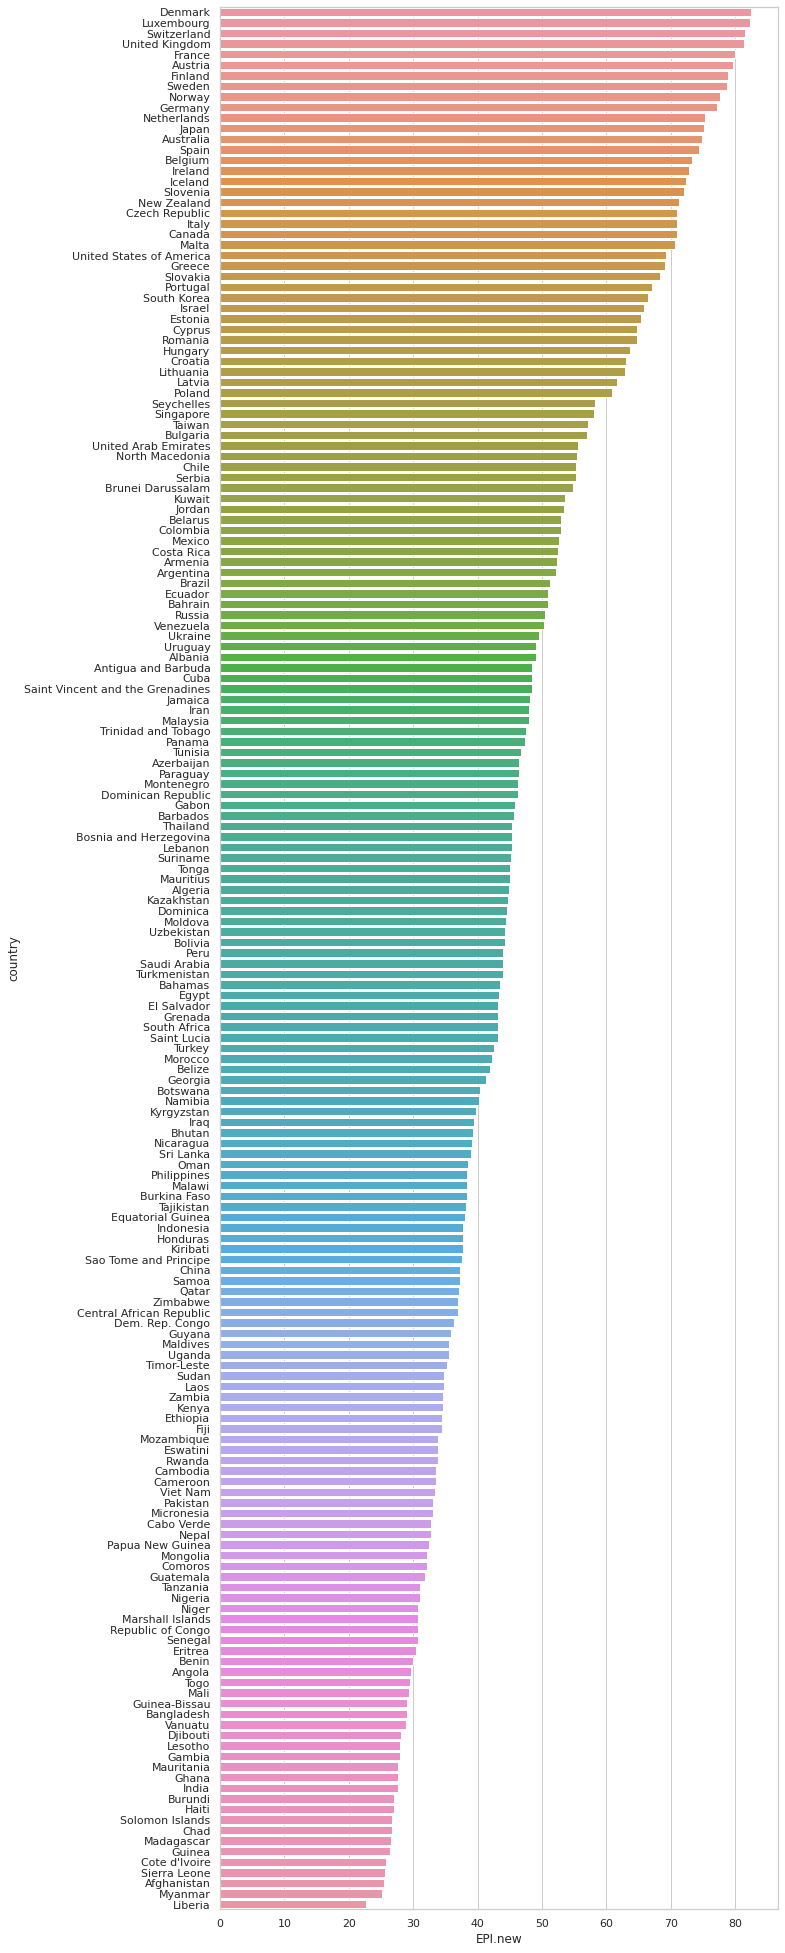

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="EPI.new", y="country", data=epi_index.sort_values(by=['EPI.new'], ascending = False))
fig = plt.gcf()
fig.set_size_inches(10, 35)

Compare Costa Rica with the best (Denmark) and the worst (Liberia) across the 11 issue categories.

In [ ]:
epi_index_compare = epi_index.loc[(epi_index['country']=='Liberia') | (epi_index['country']=='Denmark') | (epi_index['country']=='Costa Rica')]

In [ ]:
epi_index_compare

,country,EPI.new,AIR.new,H2O.new,HMT.new,WMG.new,BDH.new,ECS.new,FSH.new,CCH.new,APE.new,AGR.new,WRS.new
39,Costa Rica,52.5,56.2,66.1,53.8,64.8,70.1,35.4,10.8,54.8,33.6,19.4,9.7
46,Denmark,82.5,85.5,97.4,100.0,99.8,81.7,30.2,13.2,95.0,100.0,73.0,100.0
95,Liberia,22.6,30.9,9.8,37.3,0.0,32.6,14.6,10.6,24.9,32.7,26.2,0.0


In [ ]:
epi_index_compare_melt = pd.melt(epi_index_compare, id_vars=['country'], var_name='index', value_name='value')

In [ ]:
epi_index_compare_melt.head()

,country,index,value
0,Costa Rica,EPI.new,52.5
1,Denmark,EPI.new,82.5
2,Liberia,EPI.new,22.6
3,Costa Rica,AIR.new,56.2
4,Denmark,AIR.new,85.5


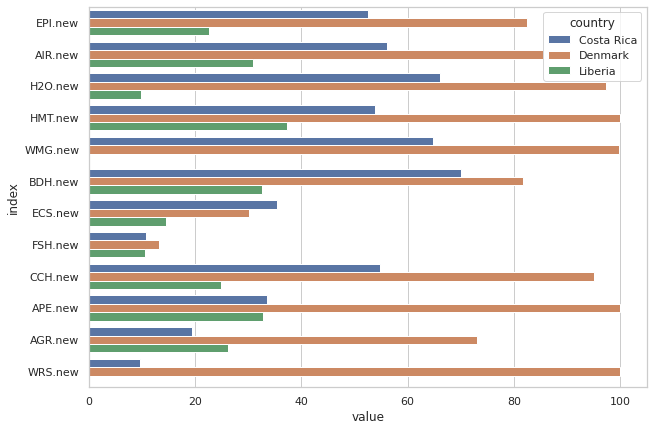

In [ ]:
ax = sns.barplot(x="value", y="index", hue="country", data=epi_index_compare_melt)
fig = plt.gcf()
fig.set_size_inches(10,7)

In [ ]:
url_data = (r'https://raw.githubusercontent.com/Hakkoda1/hakkathon-energy-data/main/EPI_Environmental_Performance_Index/epi2020indicatortla20200604.csv')
ind_info = pd.read_csv(url_data)

In [ ]:
ind_info.loc[ind_info['Type']=='IssueCategory']

,Type,Abbreviation,Variable,Short name,Order
2,IssueCategory,AIR,Air Quality,Air Quality,3
6,IssueCategory,H2O,Sanitation & Drinking Water,Sanitation & Drinking Water,7
9,IssueCategory,HMT,Heavy Metals,Heavy Metals,10
11,IssueCategory,WMG,Waste Management,Waste Management,12
14,IssueCategory,BDH,Biodiversity & Habitat,Biodiversity,15
22,IssueCategory,ECS,Ecosystem Services,Ecosystem Services,23
26,IssueCategory,FSH,Fisheries,Fisheries,27
30,IssueCategory,CCH,Climate Change,Climate Change,31
39,IssueCategory,APE,Pollution Emissions,Pollution Emissions,40
42,IssueCategory,AGR,Agriculture,Agriculture,43


In [ ]:
epi_index_compare_melt = pd.melt(ordered_epi_values, id_vars=['country'], var_name='index', value_name='value')

In [ ]:
epi_index_compare_melt.to_csv('epi_index.csv', index = False, header=True)
files.download('epi_index.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Solar potential country ranking

In [ ]:
url_data = (r'https://raw.githubusercontent.com/Hakkoda1/hakkathon-energy-data/main/solar_potentoal_countryranking_2020_data/solar_potentoal_countryranking_2020_data.xlsx%20-%20Country%20indicators.csv')
solar_pot = pd.read_csv(url_data, thousands=',', header = 1)

In [ ]:
solar_pot

,ISO_A3,Country or region,Note,World Bank \nRegion,"Total population, 2018","Total area, 2018",Evaluated area,Level 1 area \n(% of evaluated area),"Human development \nIndex, 2017","Gross domestic product (USD per capita), 2018",...,"Average practical potential \n(PVOUT Level 1, \nkWh/kWp/day), long-term","Average economic potential (LCOE, USD/kWh), 2018","Average PV \nseasonality index, long-term","PV equivalent area (% of total area), long-term","Cummulative installed PV capacity (MWp), 2018","Cummulative installed PV capacity (Wp per capita), 2018","Access to electricity\n(% of rural population), 2016","Electric power consumption (kWh per capita), 2014","Reliability of supply and transparency of tariff index, 2019","Approximate electricity \nTariffs for SMEs \n(US cent/kWh), 2019"
0,ABW,Aruba (Neth.),NaN,Other,105845,180.0,180,85%,NaN,25630.0,...,4.96,0.09,1.18,NaN,6.1,57.6,92.5,NaN,NaN,NaN
1,AFG,Afghanistan,NaN,SOA,37172386,652860.0,652860,59%,0.50,521.0,...,5.02,0.09,1.67,NaN,22.0,0.6,79.0,NaN,0.0,17.6
2,AGO,Angola,NaN,AFR,30809762,1246700.0,1246700,75%,0.58,3432.0,...,4.66,0.09,1.32,0.003,13.4,0.4,16.0,312.0,3.0,4.6
3,ALB,Albania,NaN,ECA,2866376,27400.0,27400,61%,0.78,5254.0,...,4.04,0.11,2.33,0.210,1.0,0.3,100.0,2309.0,3.0,8.7
4,AND,Andorra,NaN,Other,77006,470.0,470,11%,0.86,42030.0,...,4.20,0.10,2.15,NaN,0.0,0.0,100.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,XKO,Kosovo,NaN,ECA,1845300,10887.0,10887,79%,NaN,4281.0,...,3.70,0.12,2.70,NaN,NaN,NaN,NaN,NaN,2.0,NaN
205,YEM,Republic of Yemen,NaN,MENA,28498687,527970.0,527970,52%,0.45,944.0,...,5.21,0.08,1.41,0.005,150.0,5.3,57.7,220.0,NaN,NaN
206,ZAF,South Africa,NaN,AFR,57779622,1213090.0,1213090,84%,0.70,6374.0,...,5.00,0.11,1.23,0.116,2558.8,44.3,67.9,4198.0,4.0,14.8
207,ZMB,Zambia,NaN,AFR,17351822,743390.0,743390,80%,0.59,1540.0,...,4.83,0.09,1.39,0.007,5.0,0.3,2.7,717.0,4.0,4.7


In [ ]:
ordered_solar_pot_values = solar_pot.sort_values(by=['Cummulative installed PV capacity (Wp per capita), 2018'], ascending = False)

In [ ]:
ordered_solar_pot_values[['Country or region', 'Cummulative installed PV capacity (Wp per capita), 2018']].head(10)

,Country or region,"Cummulative installed PV capacity (Wp per capita), 2018"
49,Germany,553.9
92,Japan,438.6
10,Australia,390.6
14,Belgium,352.4
89,Italy,332.9
33,Switzerland,263.7
121,Malta,263.3
72,Greece,247.2
136,Netherlands,240.8
110,Luxembourg,220.5


In [ ]:
ordered_solar_pot_values[['Country or region', 'Cummulative installed PV capacity (Wp per capita), 2018']].tail(101)

,Country or region,"Cummulative installed PV capacity (Wp per capita), 2018"
43,Costa Rica,5.6
123,Montenegro,5.5
205,Republic of Yemen,5.3
135,Nicaragua,4.7
6,Argentina,4.3
...,...,...
118,Marshall Islands,NaN
153,West Bank and Gaza,NaN
176,Sint Maarten (Neth.),NaN
190,Tuvalu,NaN


In [ ]:
209-101 # Costa Rica position in the ranking

108

In [ ]:
ordered_solar_pot_values.loc[ordered_solar_pot_values['Country or region']=='Costa Rica', 'Cummulative installed PV capacity (Wp per capita), 2018']

43    5.6
Name: Cummulative installed PV capacity (Wp per capita), 2018, dtype: float64

### **Climate Change**

Now that we have analyzed the data and are familiar with the respective energy matrix of Costa Rica and other countries, it is important to understand the actual state of global warming, sea levels, and the outlook that currently we have for the world.

**Global Warming**

It is now more certain than ever, based on many data lines of evidence, that humans are changing the climate of Earth. As we all know, the atmosphere and oceans have warmed, which has been accompanied by rising sea levels, a sharp decline in Arctic Sea ice, and other climate changes. Unprecedented flooding, heat waves and wildfires have cost billions in damage. Habitats are undergoing rapid changes in response to changes in temperature and precipitation patterns.

Between the 2000s and early 2010s the planet warming had a slow period, nonetheless it ended dramatically with a jump to warmer temperatures between 2014 and 2015. Antarctic sea ice extent, which had been increasing, began to decline in 2014, reaching a record low in 2017 that has persisted.

Earth’s average surface air temperature has increased by about 1 °C since 1900, with over half of the increase occurring since the mid 1970s. A wide range of other observations, for example reduced Arctic Sea ice extent and increased ocean heat content, and indications from the natural together provide incontrovertible evidence of planetary-scale warming.

Having several different observations and data studies provide a lot of comprehensive images of warming throughout the climate system. As an example, the lower atmosphere and the higher layers of the ocean have also warm, snow and ice cover area are decreasing in the Northern Hemisphere, the Greenland ice sheet is shrinking, and sea level is rising. These measurements are made with a variety of land, ocean, and space-based monitoring systems, which gives added confidence in the reality of global-scale warming of Earth’s climate [1].


















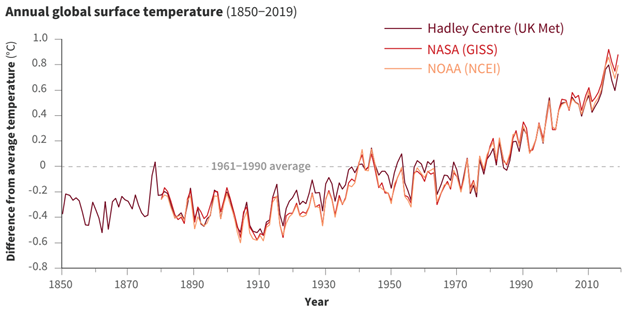   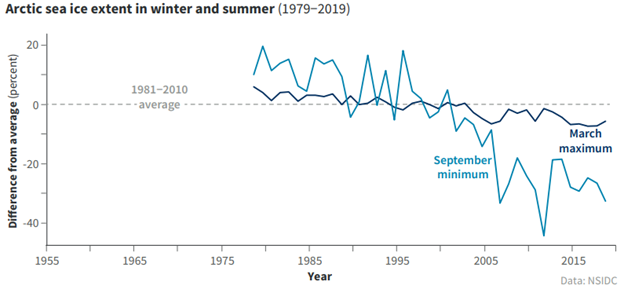

**Sea Level Rising**

As mentioned above, sea level rise is closely linked to increasing global temperatures. So, even as some uncertainties remain about how much sea level may increase this century, it is quite certain that the sea level rise will present a challenge to coastal communities, infrastructure, and ecosystems from increased permanent inundation, more frequent and extreme coastal flooding, erosion of coastal landforms, and saltwater intrusion within coastal rivers and aquifers [2].

Sea level can be measured in two different ways: "relative sea level" when referring to sea level relative to the coastal area of interest, or "absolute sea level" when referring to sea level measured from the center of the earth. The difference between absolute and relative sea levels are the vertical movements of the coastal zone with respect to the center of the earth. While a relative rise in sea level will cause the coastline to retreat, changes to the coastline, such as beach erosion, may also be related to other natural or man-made processes, independent of sea level rise. In the last 25 years, the absolute sea level is globally monitored by a series of satellites. During this altimetric period (1993-2017), the latest calculations show a sea level rise of 3-6 mm/year for the Pacific islands, with notable differences between islands.

The sea level rise over the past century is well established, and its continuous rise is also widely considered as very probable. There is therefore a high level of consensus, based on a large amount of evidence, that sea level has been rising for the last century, and will continue to do so at an accelerated pace. Storms are at the origin of most extreme sea level events. Yet, the changes in storminess (i.e. the number and severity of tropical and extra-tropical storms), are hardly detectable, and future projections regarding the number and severity of storms vary too widely to be considered reliable.

What could happen in the future? Because the changes in extreme sea level are mainly dependent on the mean sea level, and given that there is a high level of confidence that the mean sea will continue to increase, we have a high level of confidence that the occurrence of extreme sea level events will increase.

Tide gauge analyses indicate that GMSL rose at a considerably faster rate of about 3 mm/ year since 1993, a result supported by satellite data indicating a trend of 3.4 over 1993–2015. These results indicate an additional GMSL rise of about 7 cm since 1990 and about 16–21 cm since 1900. Satellite (altimetry and gravity) and in situ water column (Argo floats) measurements show that, since 2005, about one third of GMSL rise has been from steric changes (primarily thermal expansion) and about two thirds from the addition of mass to the ocean, which represents a growing land-ice contribution (compared to steric) and a departure from the relative contributions earlier in the 20th century [3].

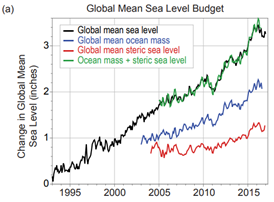     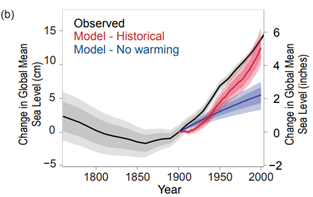     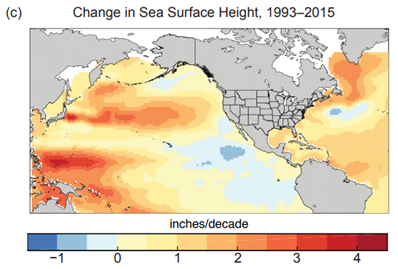

**What is the world doing about it?**

As we can see this situation is not new and country officials have known this for a very long time. In 1997 several countries of the world agreed on reducing their emission by setting goals that were suited for each of the respective production and development capacities of the countries participating, this protocol was targeted up until 2020. Nonetheless along the way it was evident that not only some countries pledging to reduce the emission would be enough and we needed a new agreement that would require action by all countries round the world. So, on 12 December 2015 in Paris, France, almost 200 governments agreed on the first ever universal, legally binding deal on climate change. 

The historic Paris Agreement sets out an action plan to limit global warming to less than 2°C above the temperature of pre-industrial times. Governments also agreed to try to limit the global temperature rise to maximum 1.5°C, as scientists around the world agreed that this would significantly reduce risks and impacts of climate change. The Agreement's other key point is to strengthen the ability of countries, especially less developed ones, to deal with impacts that do occur.

Turning this global institutional context into an effective global response to climate change requires ambitious national action. The Paris Agreement will succeed in the broader sense if states ramp up the ambition and implementation of their climate plans. That’s the whole ballgame. Fortunately, the Paris Agreement infrastructure and approach provide some mechanisms to encourage this [4].

Since the creation of the treaty there have been several milestones reached. Unfortunately, the Paris Agreement can work perfectly, and states’ individual efforts can still come up short. The Paris Agreement is a means, not an end.
Turning this global institutional context into an effective global response to climate change requires ambitious national action. The Paris Agreement will succeed in the broader sense if states ramp up the ambition and implementation of their climate plans. 

Right now, six years have passed as negotiators gather for another “last chance” summit in Glasgow, the euphoria that greeted the Paris accord has largely faded. Under the deal hammered out in 2015, all signatories were given five years to submit their roadmaps to slash greenhouse gas emissions – officially known as their “Nationally Determined Contributions” (NDCs). But despite a 12-month extension due to the Covid-19 pandemic, most countries are still struggling to translate the promises of the COP21 into concrete measures [5].

Meanwhile, global warming has accelerated. In a bombshell report, the Intergovernmental Panel on Climate Change (IPCC) warned in August that the Earth’s average temperature is on track to reach 1.5°C above pre-industrial levels by around 2030 – a full decade earlier than projected only three years ago. IPCC experts said promises made by the Paris accord signatories would, if kept, lead to an already catastrophic 3°C rise in temperatures despite commitments to keep warming to 2°C. Failure to implement even those would leave our planet on track for a 4°C to 5°C rise, at which point some of the world’s most densely populated areas would become uninhabitable.

This picture gives us a clear message, we must act now! It is the duty of each on of us as members of this planet to do as much as we can to mitigate this announced catastrophe. 

World members have identified several challenges in the way of implementing climate action at the size and speed needed to achieve global climate goals. Effectively addressing the challenges very often revolves around innovating socioeconomic and behavioral aspects; technology, market and trade conditions; financial, regulatory and institutional frameworks; and financial support [6].

If we are able to overcome each of these challenges, we might still have a chance to save our planet and be able to preserve it. The responsibility is in each on of us to do as much as we can and to push as hard as we can for our leaders to take action.

References:

[1] https://royalsociety.org/~/media/royal_society_content/policy/projects/climate-evidence-causes/climate-change-evidence-causes.pdf

[2] https://science2017.globalchange.gov/downloads/CSSR_Ch12_Sea_Level_Rise.pdf

[3] https://reliefweb.int/sites/reliefweb.int/files/resources/4_Sea_Level_and_Inundation.pdf

[4] https://theconversation.com/the-paris-agreement-is-working-as-intended-but-weve-still-got-a-long-way-to-go-173478

[5] https://webdoc.france24.com/paris-climate-agreement-cop21-global-warming/

[6] https://unfccc.int/sites/default/files/resource/Climate_Action_Support_Trends_2019.pdf

### **Conclusions:**

1. Costa Rica has achieved global recognition through its promotion of a friendly and green brand with the environment, this is mainly driven by the renewable nature of the matrix.

2. The internal primary energy supply in Costa Rica is characterized by being dependent on renewable sources, however, the secondary supply comes approximately 70% from non-renewable sources, which are generally imported oil.

3. According to the Bloomberg Climatescope ranking, India, Chile, China and Croatia are the countries that have the best conditions to invest in green energy. In this index, Costa Rica is in position 65.

4. According to the Yale Environmental Performance Index (EPI), the countries with the best ecosystem vitality and environmental health are Denmark, Luxembourg, Switzerland and the United Kingdom.

5. Since the EPI index is a composite index of several indicators, a more detailed analysis of the data shows that although Costa Rica lags behind in some aspects, it is a leader in others, for example, the H20, BDH and ECS indicators. For more information on what these indicators are, please see the PDF shared with the EPI data.

6. Solar energy is one of the most efficient and clean energies available on earth. The need to exploit this resource is crucial, so in this case our team focused on analyzing the photovoltaic potential installed in each country.

7. As we can see, the leading countries for installed photovoltaic capacity per capita would be Germany, Japan and Australia. Costa Rica in this type of energy lags behind several countries and is at the bottom of the list. However, this is understandable since Costa Rica is a very tropical country with high cloud cover. Furthermore, solar farms require extensive plains to establish, and Costa Rica has very few.

8. The need to implement and change to renewable and cleaner energy sources, arose as this sources have the potential to slow down the effects of global warming and fight against climate change.  This could be related to a diversified and green energy matrix, where we saw from the analysis that most of the countries still have a great opportunity for improvement ahead of them.
With this we see that the countries have to make a sever comittment to completley abandon the dependenace on fossil fuels and diversify their matrix in order to reduce the carbon emissions wast eproduction.

All the final charts and conclusions are present in the next Tableau Public Story (https://public.tableau.com/shared/NGY9Y9TRM?:display_count=n&:origin=viz_share_link). 